In [3]:
import numpy as np
import matplotlib.pyplot as plt 
from numpy.linalg import norm
from sklearn.metrics import r2_score
%matplotlib inline

In [4]:
data2 = np.genfromtxt('MultiVarLR.csv',delimiter=',')

In [5]:
X2=data2[:,:-1]
X2

array([[ 73.,  80.,  75.],
       [ 93.,  88.,  93.],
       [ 89.,  91.,  90.],
       [ 96.,  98., 100.],
       [ 73.,  66.,  70.],
       [ 53.,  46.,  55.],
       [ 69.,  74.,  77.],
       [ 47.,  56.,  60.],
       [ 87.,  79.,  90.],
       [ 79.,  70.,  88.],
       [ 69.,  70.,  73.],
       [ 70.,  65.,  74.],
       [ 93.,  95.,  91.],
       [ 79.,  80.,  73.],
       [ 70.,  73.,  78.],
       [ 93.,  89.,  96.],
       [ 78.,  75.,  68.],
       [ 81.,  90.,  93.],
       [ 88.,  92.,  86.],
       [ 78.,  83.,  77.],
       [ 82.,  86.,  90.],
       [ 86.,  82.,  89.],
       [ 78.,  83.,  85.],
       [ 76.,  83.,  71.],
       [ 96.,  93.,  95.]])

In [6]:
y2=data2[:,-1]
y2=y2.reshape(-1,1)
y2

array([[152.],
       [185.],
       [180.],
       [196.],
       [142.],
       [101.],
       [149.],
       [115.],
       [175.],
       [164.],
       [141.],
       [141.],
       [184.],
       [152.],
       [148.],
       [192.],
       [147.],
       [183.],
       [177.],
       [159.],
       [177.],
       [175.],
       [175.],
       [149.],
       [192.]])

In [7]:
x_0=np.ones((X2.shape[0],1))
X2=np.hstack((x_0,X2))
X2

array([[  1.,  73.,  80.,  75.],
       [  1.,  93.,  88.,  93.],
       [  1.,  89.,  91.,  90.],
       [  1.,  96.,  98., 100.],
       [  1.,  73.,  66.,  70.],
       [  1.,  53.,  46.,  55.],
       [  1.,  69.,  74.,  77.],
       [  1.,  47.,  56.,  60.],
       [  1.,  87.,  79.,  90.],
       [  1.,  79.,  70.,  88.],
       [  1.,  69.,  70.,  73.],
       [  1.,  70.,  65.,  74.],
       [  1.,  93.,  95.,  91.],
       [  1.,  79.,  80.,  73.],
       [  1.,  70.,  73.,  78.],
       [  1.,  93.,  89.,  96.],
       [  1.,  78.,  75.,  68.],
       [  1.,  81.,  90.,  93.],
       [  1.,  88.,  92.,  86.],
       [  1.,  78.,  83.,  77.],
       [  1.,  82.,  86.,  90.],
       [  1.,  86.,  82.,  89.],
       [  1.,  78.,  83.,  85.],
       [  1.,  76.,  83.,  71.],
       [  1.,  96.,  93.,  95.]])

In [8]:
weights=np.zeros((X2.shape[1],1))
weights

array([[0.],
       [0.],
       [0.],
       [0.]])

# Adam+Multivarible

In [20]:
def Adam_gradient_descent_multifeatures(X, y, num_of_iterations, learning_rate=0.01, convergence_check=0.001, Epsilon=1e-08, beta1=0.2, beta2=0.7):
    theta = np.zeros((X.shape[1], 1))
    loss = []
    y_predict = []
    weights =[]
    m_t = np.zeros((X.shape[1], 1))
    v_t = np.zeros((X.shape[1], 1))

    for i in range(0, num_of_iterations):
        print(f"****************** Iteration {i} ********************")
        weights.append(theta.flatten().tolist())
        h = X @ theta
        print("h(x):\n ", h)
        y_predict.append(h)
        error_vector = (h - y)
        print("Error Vector:\n", error_vector)
        j = norm(error_vector) ** 2 / (2 * X.shape[0])
        print("j= ", j)
        loss.append(j)
        Gradient_Vector = (X.T @ error_vector) / X.shape[0]
        print("Gradient Vector:\n", Gradient_Vector)
        Gradient_Vector_Norm = norm(Gradient_Vector)
        print("Gradient Vector Norm:\n", Gradient_Vector_Norm)

        if Gradient_Vector_Norm < convergence_check:
            break

        if i > 0:
            Cost_convergence_check = np.abs(loss[i - 1] - loss[i])
            if Cost_convergence_check < convergence_check:
                break

        m_t = beta1 * m_t + (1 - beta1) * Gradient_Vector
        v_t = beta2 * v_t + (1 - beta2) * (Gradient_Vector ** 2)
        
        t=i+1

        m_hat = m_t / (1 - beta1 ** t)
        v_hat = v_t / (1 - beta2 ** t)

        theta = theta - (learning_rate / (np.sqrt(v_hat) + Epsilon)) * m_hat
        print("theta_new:\n", theta)
    weights =np.array(weights) 
    return h, y_predict, error_vector, j, Gradient_Vector, Gradient_Vector_Norm, Cost_convergence_check, weights, theta, loss

In [23]:
h, y_predict, error_vector, j, Gradient_Vector, Gradient_Vector_Norm, Cost_convergence_check, weights, theta, loss = Adam_gradient_descent_multifeatures(X2, y2, num_of_iterations=500, learning_rate=0.05, convergence_check=0.001, Epsilon=1e-08, beta1=0.2, beta2=0.7)
print("****************** Training Report ********************")
print(f"Gradient Descent converged after {len(loss)} epochs")  
print("Error Vector:\n",error_vector)
print("Cost= ",j)
print("h(x) = y_predict:\n",h)
print('y_actual:\n',y2)
print("weights=",weights)


****************** Iteration 0 ********************
h(x):
  [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Error Vector:
 [[-152.]
 [-185.]
 [-180.]
 [-196.]
 [-142.]
 [-101.]
 [-149.]
 [-115.]
 [-175.]
 [-164.]
 [-141.]
 [-141.]
 [-184.]
 [-152.]
 [-148.]
 [-192.]
 [-147.]
 [-183.]
 [-177.]
 [-159.]
 [-177.]
 [-175.]
 [-175.]
 [-149.]
 [-192.]]
j=  13405.98
Gradient Vector:
 [[  -162.04]
 [-13075.8 ]
 [-13147.2 ]
 [-13467.08]]
Gradient Vector Norm:
 22917.545989219703
theta_new:
 [[0.05]
 [0.05]
 [0.05]
 [0.05]]
****************** Iteration 1 ********************
h(x):
  [[11.45]
 [13.75]
 [13.55]
 [14.75]
 [10.5 ]
 [ 7.75]
 [11.05]
 [ 8.2 ]
 [12.85]
 [11.9 ]
 [10.65]
 [10.5 ]
 [14.  ]
 [11.65]
 [11.1 ]
 [13.95]
 [11.1 ]
 [13.25]
 [13.35]
 [11.95]
 [12.95]
 [12.9 ]
 [12.35]
 [11.55]
 [14.25]]
Error Vector:
 [[-140.55]
 [-171.25]
 [-166.45]
 [-181.25]
 [-131.5 ]
 [ -93.25]
 [-137.95]

Gradient Vector Norm:
 753.5436583864329
theta_new:
 [[0.64451054]
 [0.63609933]
 [0.63357861]
 [0.71262291]]
****************** Iteration 61 ********************
h(x):
  [[151.21276835]
 [181.83059618]
 [179.04906595]
 [195.06304059]
 [138.77955333]
 [102.69665095]
 [146.29214521]
 [108.77895556]
 [170.17392402]
 [157.9576761 ]
 [140.90733915]
 [139.08816836]
 [184.8404006 ]
 [153.60411852]
 [147.00728884]
 [184.60204351]
 [146.23701162]
 [175.46456141]
 [176.19605358]
 [157.71924664]
 [171.4284776 ]
 [170.72593759]
 [163.42022991]
 [152.17131052]
 [188.33203302]]
Error Vector:
 [[ -0.78723165]
 [ -3.16940382]
 [ -0.95093405]
 [ -0.93695941]
 [ -3.22044667]
 [  1.69665095]
 [ -2.70785479]
 [ -6.22104444]
 [ -4.82607598]
 [ -6.0423239 ]
 [ -0.09266085]
 [ -1.91183164]
 [  0.8404006 ]
 [  1.60411852]
 [ -0.99271116]
 [ -7.39795649]
 [ -0.76298838]
 [ -7.53543859]
 [ -0.80394642]
 [ -1.28075336]
 [ -5.5715224 ]
 [ -4.27406241]
 [-11.57977009]
 [  3.17131052]
 [ -3.66796698]]
j=  9.215065

 [17.13280969]]
Gradient Vector Norm:
 41.23973081643035
theta_new:
 [[0.63162491]
 [0.62046781]
 [0.61782852]
 [0.77392687]]
****************** Iteration 109 ********************
h(x):
  [[153.39657247]
 [184.67924058]
 [181.72907429]
 [198.13641737]
 [140.87733876]
 [104.50250898]
 [148.75558383]
 [110.82762173]
 [173.07419638]
 [161.00214344]
 [143.18856224]
 [141.4938143 ]
 [187.4561865 ]
 [155.57152558]
 [149.53214999]
 [187.61884972]
 [147.99228078]
 [178.46928391]
 [178.63072751]
 [159.90025084]
 [174.296657  ]
 [173.53328727]
 [166.09166583]
 [154.01575398]
 [191.17764038]]
Error Vector:
 [[ 1.39657247]
 [-0.32075942]
 [ 1.72907429]
 [ 2.13641737]
 [-1.12266124]
 [ 3.50250898]
 [-0.24441617]
 [-4.17237827]
 [-1.92580362]
 [-2.99785656]
 [ 2.18856224]
 [ 0.4938143 ]
 [ 3.4561865 ]
 [ 3.57152558]
 [ 1.53214999]
 [-4.38115028]
 [ 0.99228078]
 [-4.53071609]
 [ 1.63072751]
 [ 0.90025084]
 [-2.703343  ]
 [-1.46671273]
 [-8.90833417]
 [ 5.01575398]
 [-0.82235962]]
j=  4.88419442988301

 [ 9.77972217]]
j=  43.90555312034039
Gradient Vector:
 [[  8.84827455]
 [713.15571354]
 [716.6291764 ]
 [724.95810734]]
Gradient Vector Norm:
 1244.1024867690476
theta_new:
 [[0.57616578]
 [0.56913744]
 [0.56894479]
 [0.79603803]]
****************** Iteration 156 ********************
h(x):
  [[147.34163448]
 [177.60462614]
 [174.64679667]
 [190.57375258]
 [135.39621724]
 [100.69400215]
 [143.24349201]
 [106.94881556]
 [166.68118427]
 [155.41550555]
 [137.78356073]
 [136.30401223]
 [179.99516363]
 [149.16438307]
 [144.03972268]
 [180.56168501]
 [141.77033153]
 [171.91286643]
 [171.46245191]
 [153.48623212]
 [167.81811061]
 [167.02284318]
 [159.85453633]
 [147.57172907]
 [183.74883848]]
Error Vector:
 [[ -4.65836552]
 [ -7.39537386]
 [ -5.35320333]
 [ -5.42624742]
 [ -6.60378276]
 [ -0.30599785]
 [ -5.75650799]
 [ -8.05118444]
 [ -8.31881573]
 [ -8.58449445]
 [ -3.21643927]
 [ -4.69598777]
 [ -4.00483637]
 [ -2.83561693]
 [ -3.96027732]
 [-11.43831499]
 [ -5.22966847]
 [-11.08713357]
 [

 [-2.12679824e+00]]
j=  4.744879710211976
Gradient Vector:
 [[  -1.13065148]
 [ -93.07714228]
 [ -94.29546158]
 [-103.27757082]]
Gradient Vector Norm:
 167.99560559158843
theta_new:
 [[0.56798761]
 [0.57447493]
 [0.57991538]
 [0.87788085]]
****************** Iteration 216 ********************
h(x):
  [[154.73895117]
 [186.66962801]
 [183.47783189]
 [200.33737251]
 [142.23073164]
 [105.97471281]
 [150.71732088]
 [112.71642125]
 [175.3698975 ]
 [163.79909798]
 [144.88613598]
 [143.43891487]
 [188.97327397]
 [156.43003905]
 [151.58976128]
 [189.88318593]
 [148.56658299]
 [180.93575963]
 [179.97174895]
 [161.10683364]
 [176.5569305 ]
 [175.65728786]
 [168.12988042]
 [154.6905987 ]
 [193.04839138]]
Error Vector:
 [[ 2.73895117]
 [ 1.66962801]
 [ 3.47783189]
 [ 4.33737251]
 [ 0.23073164]
 [ 4.97471281]
 [ 1.71732088]
 [-2.28357875]
 [ 0.3698975 ]
 [-0.20090202]
 [ 3.88613598]
 [ 2.43891487]
 [ 4.97327397]
 [ 4.43003905]
 [ 3.58976128]
 [-2.11681407]
 [ 1.56658299]
 [-2.06424037]
 [ 2.9717489

 [[0.50466292]
 [0.52538164]
 [0.53603119]
 [0.87546536]]
****************** Iteration 259 ********************
h(x):
  [[147.39992001]
 [177.95417883]
 [174.83434977]
 [191.0188932 ]
 [135.51815652]
 [101.15791949]
 [143.83313703]
 [107.74326838]
 [167.35121219]
 [156.57294763]
 [138.18715082]
 [136.90784186]
 [179.95546645]
 [148.80127912]
 [144.69795284]
 [181.11660611]
 [141.21841472]
 [172.72166155]
 [171.34313787]
 [153.38585251]
 [168.47652234]
 [167.55845876]
 [160.3895754 ]
 [147.08229706]
 [183.96141043]]
Error Vector:
 [[ -4.60007999]
 [ -7.04582117]
 [ -5.16565023]
 [ -4.9811068 ]
 [ -6.48184348]
 [  0.15791949]
 [ -5.16686297]
 [ -7.25673162]
 [ -7.64878781]
 [ -7.42705237]
 [ -2.81284918]
 [ -4.09215814]
 [ -4.04453355]
 [ -3.19872088]
 [ -3.30204716]
 [-10.88339389]
 [ -5.78158528]
 [-10.27833845]
 [ -5.65686213]
 [ -5.61414749]
 [ -8.52347766]
 [ -7.44154124]
 [-14.6104246 ]
 [ -1.91770294]
 [ -8.03858957]]
j=  23.006745541814794
Gradient Vector:
 [[  -6.07249556]
 [-49

In [25]:
R2=r2_score(y2, h)
print("r2_score:",R2)

r2_score: 0.9862581406578275


# Loss vs. iterations

Text(0, 0.5, 'Loss')

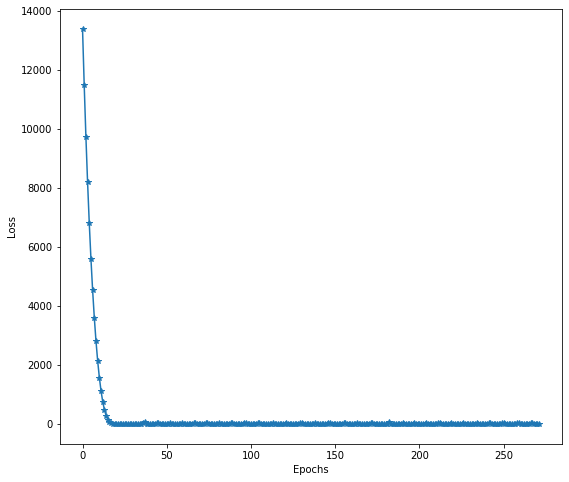

In [26]:
plt.figure(figsize=(9,8))
plt.plot(loss,'*-')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Loss vs. each parameter

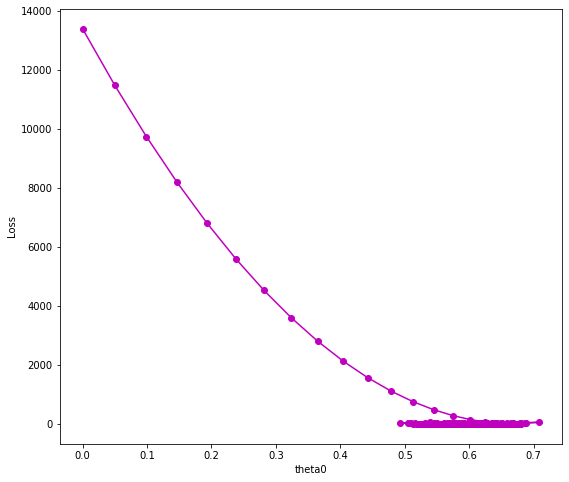

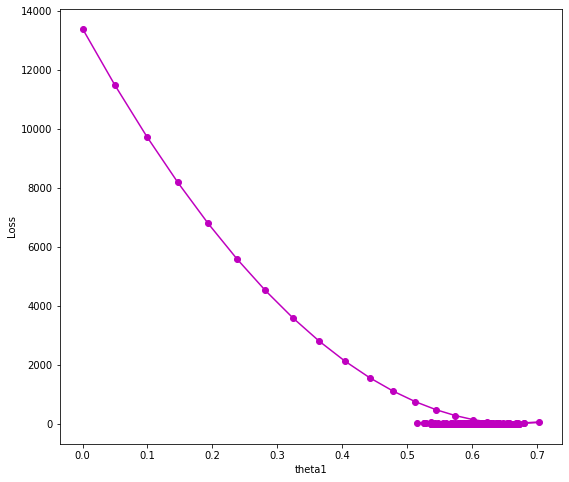

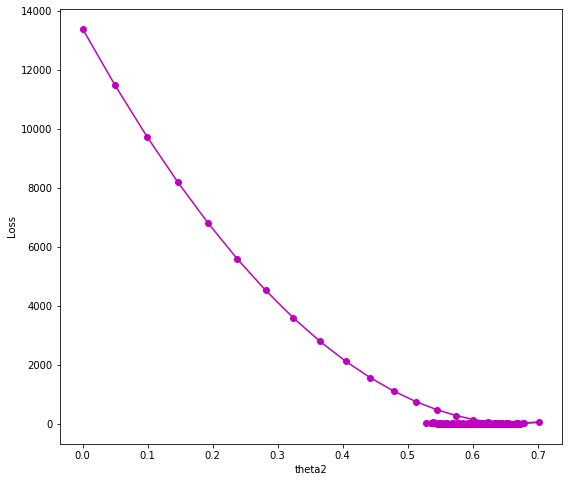

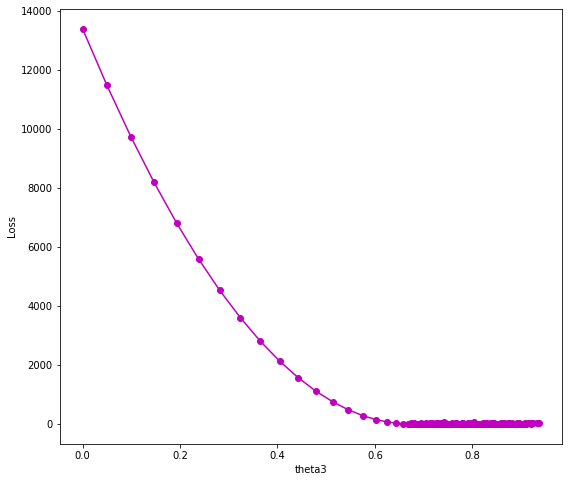

In [35]:
for i in range (weights.shape[1]):
    plt.figure(figsize=(9, 8))
    plt.plot(weights[:,i], loss,'o-',color='m')
    plt.xlabel(f'theta{i}')
    plt.ylabel('Loss')

# Adam+Multivarible+Mini-Batch

In [43]:
def Adam_mini_batch_gradient_descent(X, y, num_of_iterations, learning_rate=0.01, batch_size=None, convergence_check=0.001, Epsilon=1e-08, beta1=0.2, beta2=0.7): 
    
    m = X.shape[0]
    theta = np.zeros((X.shape[1], 1))
    loss = []
    weights = []
    gradient_norms = []
    m_t = np.zeros_like(theta)
    v_t = np.zeros_like(theta)

    if batch_size is None or batch_size > m:
        batch_size = m  
        
    for epoch in range(0, num_of_iterations):
        print(f"****************** Epoch {epoch} ********************")
        for i in range(0, m, batch_size):
            weights.append(theta.flatten().tolist())
            X_mini_batch = X[i:i+batch_size]
            y_mini_batch = y[i:i+batch_size]

            h = X_mini_batch @ theta
            error_vector = (h - y_mini_batch)
            j = norm(error_vector)**2 / (2 * X_mini_batch.shape[0])
            loss.append(j)

            Gradient_Vector = (X_mini_batch.T @ error_vector) / (X_mini_batch.shape[0])
            Gradient_Vector_Norm = norm(Gradient_Vector)

            t = i + 1

            m_t = beta1 * m_t + (1 - beta1) * Gradient_Vector
            v_t = beta2 * v_t + (1 - beta2) * (Gradient_Vector ** 2)

            m_hat = m_t / (1 - beta1 ** t)
            v_hat = v_t / (1 - beta2 ** t)

            theta = theta - (learning_rate / (np.sqrt(v_hat) + Epsilon)) * m_hat

        gradient_norms.append(Gradient_Vector_Norm)
        print("Cost =", j)
        print("Gradient Vector:\n", Gradient_Vector)
        print("Gradient Vector Norm:\n", Gradient_Vector_Norm)
        print("Theta new:\n", theta)

        if Gradient_Vector_Norm < convergence_check:
            break

        if epoch > 0 and abs(loss[-int(m/batch_size)] - loss[-1]) < convergence_check:
            break

    weights = np.array(weights) 
    y_pred = X @ theta
    return h, error_vector, j, weights, theta, loss, gradient_norms, epoch, y_pred


In [44]:
h, error_vector, j, weights, theta, loss, gradient_norms,epoch,y_pred=Adam_mini_batch_gradient_descent(X2, y2, num_of_iterations=500, learning_rate=0.01, batch_size=3, convergence_check=0.001, Epsilon=1e-08, beta1=0.2, beta2=0.7)
print("****************** Training Report ********************")
print(f"Gradient Descent converged after {epoch+1} epochs")  
print("Error Vector:\n",error_vector)
print("Cost= ",j)
print("h(x) = y_predict:\n",h)
print('y_actual:\n',y2)
print("weights=",weights)

****************** Epoch 0 ********************
Cost = 14048.513168095526
Gradient Vector:
 [[  -167.62167621]
 [-16091.68091637]
 [-15588.81588774]
 [-15924.05924016]]
Gradient Vector Norm:
 27487.399571558482
Theta new:
 [[0.09670086]
 [0.09686072]
 [0.09683538]
 [0.09696141]]
****************** Epoch 1 ********************
Cost = 10413.770649610946
Gradient Vector:
 [[  -144.31750171]
 [-13854.48016396]
 [-13421.52765884]
 [-13710.16266225]]
Gradient Vector Norm:
 23665.870215932813
Theta new:
 [[0.17898137]
 [0.1782207 ]
 [0.17814823]
 [0.17866049]]
****************** Epoch 2 ********************
Cost = 7364.363390060561
Gradient Vector:
 [[  -121.36196595]
 [-11650.74873154]
 [-11286.66283368]
 [-11529.38676559]]
Gradient Vector Norm:
 19901.512300431772
Theta new:
 [[0.26029971]
 [0.25858697]
 [0.25847082]
 [0.25937169]]
****************** Epoch 3 ********************
Cost = 4860.810880900174
Gradient Vector:
 [[  -98.59828478]
 [-9465.435339  ]
 [-9169.64048465]
 [-9366.83705422

****************** Epoch 63 ********************
Cost = 0.7271640191420538
Gradient Vector:
 [[  1.20595524]
 [115.77170294]
 [112.15383722]
 [114.5657477 ]]
Gradient Vector Norm:
 197.75827486479025
Theta new:
 [[0.64873886]
 [0.60315355]
 [0.60098741]
 [0.81695843]]
****************** Epoch 64 ********************
Cost = 0.7292296757406483
Gradient Vector:
 [[  1.2076669 ]
 [115.9360228 ]
 [112.31302209]
 [114.7283559 ]]
Gradient Vector Norm:
 198.03896187539345
Theta new:
 [[0.64834448]
 [0.60191207]
 [0.599966  ]
 [0.81921481]]
****************** Epoch 65 ********************
Cost = 0.7312349862253489
Gradient Vector:
 [[  1.20932625]
 [116.09531974]
 [112.467341  ]
 [114.8859935 ]]
Gradient Vector Norm:
 198.31106885187148
Theta new:
 [[0.64795588]
 [0.60067198]
 [0.59895357]
 [0.82146105]]
****************** Epoch 66 ********************
Cost = 0.7331803906812366
Gradient Vector:
 [[  1.21093385]
 [116.24964929]
 [112.61684775]
 [115.03871545]]
Gradient Vector Norm:
 198.57469066

Cost = 0.7684282337038283
Gradient Vector:
 [[  1.23970015]
 [119.01121461]
 [115.29211416]
 [117.77151446]]
Gradient Vector Norm:
 203.29192621710115
Theta new:
 [[0.63529318]
 [0.54902397]
 [0.56302749]
 [0.9088966 ]]
****************** Epoch 109 ********************
Cost = 0.7683659087794058
Gradient Vector:
 [[  1.23964988]
 [119.00638819]
 [115.28743856]
 [117.76673832]]
Gradient Vector Norm:
 203.28368184872588
Theta new:
 [[0.63505647]
 [0.54787037]
 [0.56234865]
 [0.91072724]]
****************** Epoch 110 ********************
Cost = 0.7682713893637454
Gradient Vector:
 [[  1.23957363]
 [118.99906827]
 [115.28034739]
 [117.75949464]]
Gradient Vector Norm:
 203.27117814082976
Theta new:
 [[0.63482067]
 [0.54671932]
 [0.56167606]
 [0.91254909]]
****************** Epoch 111 ********************
Cost = 0.7681453061502651
Gradient Vector:
 [[  1.23947191]
 [118.98930323]
 [115.2708875 ]
 [117.74983132]]
Gradient Vector Norm:
 203.25449774943127
Theta new:
 [[0.63458565]
 [0.54557085]

****************** Epoch 156 ********************
Cost = 0.7384897064958377
Gradient Vector:
 [[  1.21531042]
 [116.66980016]
 [113.02386891]
 [115.45448974]]
Gradient Vector Norm:
 199.2923816776726
Theta new:
 [[0.62308375]
 [0.49695396]
 [0.53666077]
 [0.98721989]]
****************** Epoch 157 ********************
Cost = 0.7374529112007214
Gradient Vector:
 [[  1.21445701]
 [116.58787269]
 [112.94450167]
 [115.37341569]]
Gradient Vector Norm:
 199.152435260524
Theta new:
 [[0.6227726 ]
 [0.49594968]
 [0.53623015]
 [0.98865154]]
****************** Epoch 158 ********************
Cost = 0.7364047908151061
Gradient Vector:
 [[  1.21359366]
 [116.50499176]
 [112.86421076]
 [115.29139809]]
Gradient Vector Norm:
 199.0108601549625
Theta new:
 [[0.62245771]
 [0.49494901]
 [0.53580378]
 [0.9900753 ]]
****************** Epoch 159 ********************
Cost = 0.7353455745845981
Gradient Vector:
 [[  1.21272056]
 [116.42117346]
 [112.78301179]
 [115.20845291]]
Gradient Vector Norm:
 198.86768388

****************** Epoch 215 ********************
Cost = 0.6632032232395002
Gradient Vector:
 [[  1.1516972 ]
 [110.56293145]
 [107.10783984]
 [109.41123425]]
Gradient Vector Norm:
 188.86078405075733
Theta new:
 [[0.59660431]
 [0.44422324]
 [0.51769151]
 [1.05872574]]
****************** Epoch 216 ********************
Cost = 0.661750004118008
Gradient Vector:
 [[  1.1504347 ]
 [110.44173159]
 [106.99042747]
 [109.29129688]]
Gradient Vector Norm:
 188.65375353136946
Theta new:
 [[0.59599227]
 [0.44344698]
 [0.51746962]
 [1.05972175]]
****************** Epoch 217 ********************
Cost = 0.660292904228762
Gradient Vector:
 [[  1.14916744]
 [110.32007438]
 [106.87257205]
 [109.17090694]]
Gradient Vector Norm:
 188.44594178498852
Theta new:
 [[0.59537442]
 [0.44267464]
 [0.51725063]
 [1.06071101]]
****************** Epoch 218 ********************
Cost = 0.6588320222473931
Gradient Vector:
 [[  1.14789549]
 [110.19796656]
 [106.75428011]
 [109.05007108]]
Gradient Vector Norm:
 188.237360

 [104.07005991]]
Gradient Vector Norm:
 179.64108755396134
Theta new:
 [[0.56595996]
 [0.41490324]
 [0.51065947]
 [1.09507592]]
****************** Epoch 258 ********************
Cost = 0.5985076637171526
Gradient Vector:
 [[  1.09408196]
 [105.03186782]
 [101.74962195]
 [103.93778586]]
Gradient Vector Norm:
 179.41276200436775
Theta new:
 [[0.56511079]
 [0.41428412]
 [0.51054351]
 [1.09581353]]
****************** Epoch 259 ********************
Cost = 0.596984043784384
Gradient Vector:
 [[  1.09268847]
 [104.8980929 ]
 [101.6200275 ]
 [103.80540444]]
Gradient Vector Norm:
 179.18425110151767
Theta new:
 [[0.56425633]
 [0.4136685 ]
 [0.51042967]
 [1.09654566]]
****************** Epoch 260 ********************
Cost = 0.5954612379543347
Gradient Vector:
 [[  1.09129395]
 [104.76421879]
 [101.49033695]
 [103.67292484]]
Gradient Vector Norm:
 178.95557074218178
Theta new:
 [[0.56339662]
 [0.41305636]
 [0.51031794]
 [1.09727233]]
****************** Epoch 261 ********************
Cost = 0.5939

Cost = 0.530788847405197
Gradient Vector:
 [[ 1.03032893]
 [98.91157685]
 [95.82059008]
 [97.88124793]]
Gradient Vector Norm:
 168.95823682539515
Theta new:
 [[0.52076621]
 [0.38935299]
 [0.50720967]
 [1.12433896]]
****************** Epoch 305 ********************
Cost = 0.5294021080488319
Gradient Vector:
 [[ 1.02898213]
 [98.78228412]
 [95.69533774]
 [97.75330199]]
Gradient Vector Norm:
 168.7373822692597
Theta new:
 [[0.51969806]
 [0.38888255]
 [0.50717413]
 [1.12485362]]
****************** Epoch 306 ********************
Cost = 0.5280201648020499
Gradient Vector:
 [[ 1.02763823]
 [98.65326998]
 [95.57035529]
 [97.62563175]]
Gradient Vector Norm:
 168.51700360314933
Theta new:
 [[0.51862596]
 [0.38841491]
 [0.5071399 ]
 [1.1253643 ]]
****************** Epoch 307 ********************
Cost = 0.5266430731928755
Gradient Vector:
 [[ 1.0262973 ]
 [98.52454073]
 [95.44564883]
 [97.49824343]]
Gradient Vector Norm:
 168.29711156897264
Theta new:
 [[0.51754993]
 [0.38795005]
 [0.50710696]
 [1

 [89.94051057]]
Gradient Vector Norm:
 155.25129078946506
Theta new:
 [[0.43926519]
 [0.36271437]
 [0.50709702]
 [1.15192193]]
****************** Epoch 374 ********************
Cost = 0.44717044720461363
Gradient Vector:
 [[ 0.94569598]
 [90.78681448]
 [87.94972652]
 [89.84111849]]
Gradient Vector Norm:
 155.07972463077994
Theta new:
 [[0.43798895]
 [0.3624043 ]
 [0.50712058]
 [1.15222321]]
****************** Epoch 375 ********************
Cost = 0.44618642057352026
Gradient Vector:
 [[ 0.94465488]
 [90.68686842]
 [87.85290378]
 [89.74221354]]
Gradient Vector Norm:
 154.90899932310282
Theta new:
 [[0.43671056]
 [0.36209611]
 [0.50714462]
 [1.1525222 ]]
****************** Epoch 376 ********************
Cost = 0.4452083206654098
Gradient Vector:
 [[ 0.94361891]
 [90.58741506]
 [87.75655834]
 [89.64379615]]
Gradient Vector Norm:
 154.73911561730947
Theta new:
 [[0.43543005]
 [0.36178978]
 [0.50716913]
 [1.15281891]]
****************** Epoch 377 ********************
Cost = 0.44423613532230

Cost = 0.4027978787674857
Gradient Vector:
 [[ 0.89754986]
 [86.1647869 ]
 [83.47213731]
 [85.26723704]]
Gradient Vector Norm:
 147.18449482154332
Theta new:
 [[0.36777015]
 [0.34839186]
 [0.50887193]
 [1.16532997]]
****************** Epoch 428 ********************
Cost = 0.4021036932571306
Gradient Vector:
 [[ 0.89677611]
 [86.09050629]
 [83.40017797]
 [85.19373019]]
Gradient Vector Norm:
 147.05761058427066
Theta new:
 [[0.36640558]
 [0.34816829]
 [0.50891138]
 [1.16553091]]
****************** Epoch 429 ********************
Cost = 0.40141440165503306
Gradient Vector:
 [[ 0.89600714]
 [86.01668589]
 [83.32866445]
 [85.12067874]]
Gradient Vector Norm:
 146.931512446483
Theta new:
 [[0.36503984]
 [0.34794606]
 [0.50895097]
 [1.16573038]]
****************** Epoch 430 ********************
Cost = 0.40072998061319937
Gradient Vector:
 [[ 0.89524296]
 [85.94332436]
 [83.25759548]
 [85.0480814 ]]
Gradient Vector Norm:
 146.80619815709107
Theta new:
 [[0.36367295]
 [0.34772516]
 [0.5089907 ]
 

 [[ 0.85704905]
 [82.27670919]
 [79.70556203]
 [81.41966014]]
Gradient Vector Norm:
 140.54297949536542
Theta new:
 [[0.27863014]
 [0.33647863]
 [0.51153812]
 [1.17567934]]
****************** Epoch 492 ********************
Cost = 0.36683904696124925
Gradient Vector:
 [[ 0.85655011]
 [82.22881073]
 [79.65916039]
 [81.37226062]]
Gradient Vector Norm:
 140.46116055219645
Theta new:
 [[0.27721636]
 [0.33632631]
 [0.51158014]
 [1.17580705]]
****************** Epoch 493 ********************
Cost = 0.3664150042161322
Gradient Vector:
 [[ 0.85605491]
 [82.18127133]
 [79.6131066 ]
 [81.32521642]]
Gradient Vector Norm:
 140.37995496776603
Theta new:
 [[0.27580216]
 [0.3361749 ]
 [0.51162213]
 [1.17593389]]
****************** Epoch 494 ********************
Cost = 0.36599439191788746
Gradient Vector:
 [[ 0.85556343]
 [82.13408934]
 [79.56739905]
 [81.27852591]]
Gradient Vector Norm:
 140.29935989208155
Theta new:
 [[0.27438756]
 [0.33602438]
 [0.51166408]
 [1.17605987]]
****************** Epoch 49

In [45]:
R2=r2_score(y2, y_pred)
print("r2_score:",R2)

r2_score: 0.9861927337967912


# Loss vs. iterations

Text(0, 0.5, 'Loss')

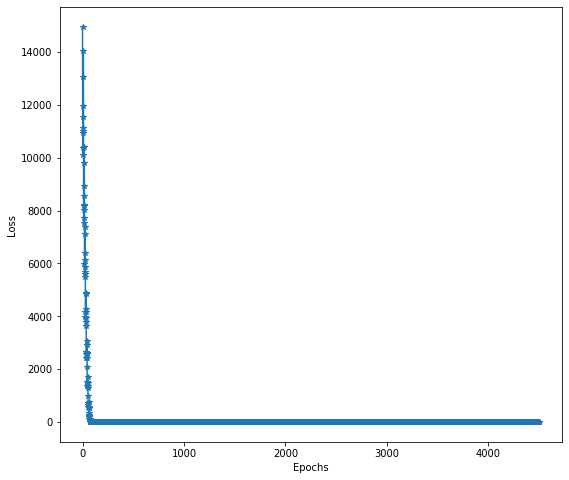

In [46]:
plt.figure(figsize=(9,8))
plt.plot(loss,'*-')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Loss vs. each parameter

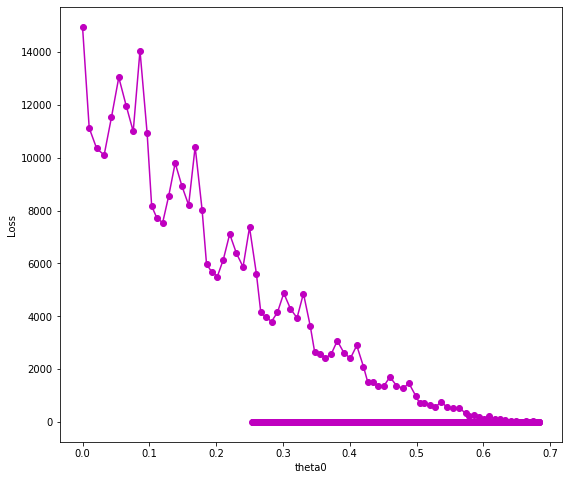

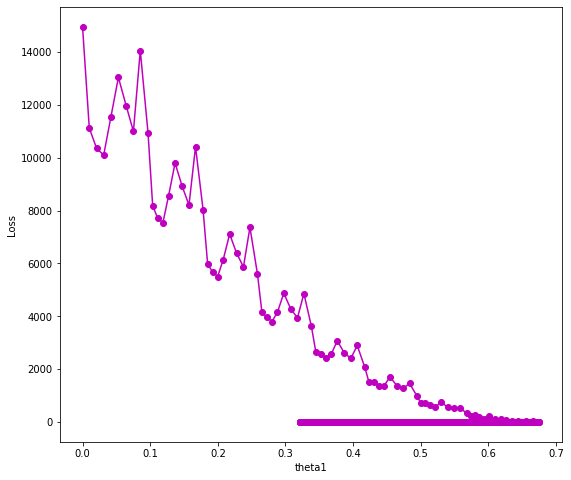

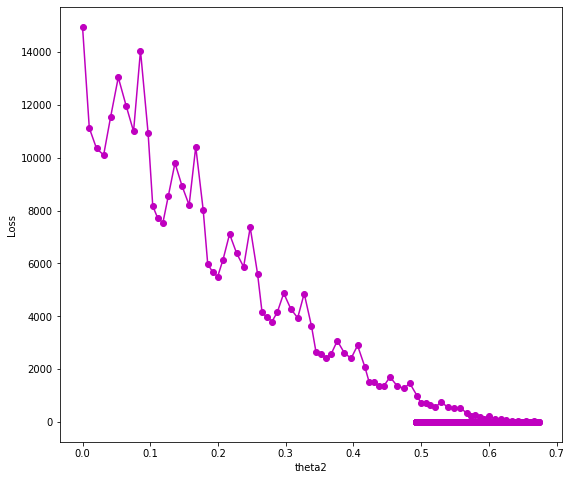

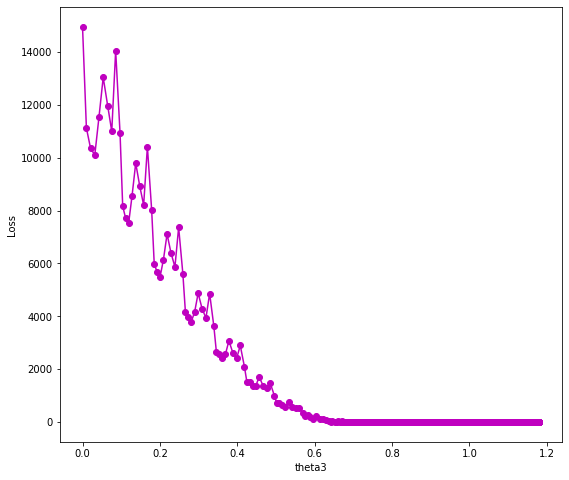

In [47]:
for i in range (weights.shape[1]):
    plt.figure(figsize=(9, 8))
    plt.plot(weights[:,i], loss,'o-',color='m')
    plt.xlabel(f'theta{i}')
    plt.ylabel('Loss')

# Adam+Multivariable+Stochastic

In [48]:
def Adam_stochastic_gradient_descent(X, y, num_of_iterations, learning_rate=0.01, convergence_check=0.001, Epsilon=1e-08, beta1=0.2, beta2=0.7): 
    
    m = X.shape[0]
    theta = np.zeros((X.shape[1], 1))
    loss = []
    weights = []
    gradient_norms = []
    m_t = np.zeros_like(theta)
    v_t = np.zeros_like(theta)
        
    for epoch in range(0, num_of_iterations):
        print(f"****************** Epoch {epoch} ********************")
        for i in range(m):
            weights.append(theta.flatten().tolist())
            x_i = X[i:i+1]
            y_i = y[i:i+1]

            h = x_i @ theta
            error = h - y_i
            j = norm(error)**2 / 2
            loss.append(j)

            Gradient_Vector = (x_i.T @ error) / 1 
            Gradient_Vector_Norm = norm(Gradient_Vector)

            t = i + 1

            m_t = beta1 * m_t + (1 - beta1) * Gradient_Vector
            v_t = beta2 * v_t + (1 - beta2) * (Gradient_Vector ** 2)

            m_hat = m_t / (1 - beta1 ** t)
            v_hat = v_t / (1 - beta2 ** t)

            theta = theta - (learning_rate / (np.sqrt(v_hat) + Epsilon)) * m_hat

            gradient_norms.append(Gradient_Vector_Norm)
            print("Cost =", j)
            print("Gradient Vector:\n", Gradient_Vector)
            print("Gradient Vector Norm:\n", Gradient_Vector_Norm)
            print("Theta new:\n", theta)

        if Gradient_Vector_Norm < convergence_check:
             break

        if epoch > 0 and abs(loss[-1] - loss[-(m+1)]) < convergence_check:
            break

    weights = np.array(weights) 
    y_pred = X @ theta
    return h, error, j, weights, theta, loss, gradient_norms, epoch, y_pred


In [50]:
h, error, j, weights, theta, loss, gradient_norms, epoch, y_pred= Adam_stochastic_gradient_descent(X2, y2, num_of_iterations=500, learning_rate=0.01, convergence_check=0.001, Epsilon=1e-08, beta1=0.2, beta2=0.7)
print("****************** Training Report ********************")
print(f"Gradient Descent converged after {epoch+1} epochs")  
print("Error Vector:\n",error_vector)
print("Cost= ",j)
print("h(x) = y_predict:\n",h)
print('y_actual:\n',y2)
print("weights=",weights)

****************** Epoch 0 ********************
Cost = 11552.0
Gradient Vector:
 [[  -152.]
 [-11096.]
 [-12160.]
 [-11400.]]
Gradient Vector Norm:
 20024.233318656672
Theta new:
 [[0.01]
 [0.01]
 [0.01]
 [0.01]]
Cost = 16607.531250000553
Gradient Vector:
 [[  -182.25]
 [-16949.25]
 [-16038.  ]
 [-16949.25]]
Gradient Vector Norm:
 28841.02651064153
Theta new:
 [[0.02039677]
 [0.02077723]
 [0.0205663 ]
 [0.02074278]]
Cost = 15206.292949204611
Gradient Vector:
 [[  -174.39204655]
 [-15520.89214257]
 [-15869.67623566]
 [-15695.28418912]]
Gradient Vector Norm:
 27186.707691242045
Theta new:
 [[0.03055225]
 [0.0310833 ]
 [0.03096271]
 [0.03105828]]
Cost = 17455.578739841018
Gradient Vector:
 [[  -186.84527685]
 [-17937.14657722]
 [-18310.83713091]
 [-18684.52768461]]
Gradient Vector Norm:
 31720.253304819555
Theta new:
 [[0.04090692]
 [0.04180083]
 [0.04176504]
 [0.04189494]]
Cost = 8873.583641725672
Gradient Vector:
 [[ -133.21849452]
 [-9724.95010031]
 [-8792.42063864]
 [-9325.29461674]]


Cost = 11.23956420661775
Gradient Vector:
 [[  -4.74121592]
 [-384.03848963]
 [-426.70943293]
 [-440.93308069]]
Gradient Vector Norm:
 723.8860148123687
Theta new:
 [[0.70050808]
 [0.67542955]
 [0.67943552]
 [0.68700576]]
Cost = 11.181115680511981
Gradient Vector:
 [[  4.7288721 ]
 [416.14074501]
 [435.05623342]
 [406.68300081]]
Gradient Vector Norm:
 726.5400685970255
Theta new:
 [[0.6939194 ]
 [0.66862452]
 [0.67258211]
 [0.68085489]]
Cost = 2.198230817898304
Gradient Vector:
 [[  2.0967741 ]
 [163.54837997]
 [174.03225049]
 [161.45160587]]
Gradient Vector Norm:
 288.28165793449864
Theta new:
 [[0.68824671]
 [0.66327438]
 [0.66708465]
 [0.67581462]]
Cost = 6.958905217740005
Gradient Vector:
 [[  -3.73065818]
 [-305.91397053]
 [-320.83660324]
 [-335.75923595]]
Gradient Vector Norm:
 556.1183917897351
Theta new:
 [[0.69465775]
 [0.66948001]
 [0.67338697]
 [0.68244252]]
Cost = 0.30027038277789014
Gradient Vector:
 [[ -0.77494565]
 [-66.64532618]
 [-63.54554357]
 [-68.97016314]]
Gradient

 [[  3.75457405]
 [349.17538621]
 [356.6845343 ]
 [341.66623812]]
Gradient Vector Norm:
 604.8943894981171
Theta new:
 [[0.68500037]
 [0.64036507]
 [0.65275403]
 [0.68474579]]
Cost = 1.0960967228110254
Gradient Vector:
 [[  1.48060577]
 [116.96785582]
 [118.44846159]
 [108.0842212 ]]
Gradient Vector Norm:
 198.48402558209534
Theta new:
 [[0.67872574]
 [0.63362367]
 [0.64606326]
 [0.67845924]]
Cost = 4.162128501666051
Gradient Vector:
 [[  -2.88517885]
 [-201.96251958]
 [-210.61805614]
 [-225.04395039]]
Gradient Vector Norm:
 368.5131324014925
Theta new:
 [[0.68531439]
 [0.63952643]
 [0.65209336]
 [0.68499409]]
Cost = 32.34481388412867
Gradient Vector:
 [[  -8.04298625]
 [-747.99772096]
 [-715.82577598]
 [-772.1266797 ]]
Gradient Vector Norm:
 1291.5693675757614
Theta new:
 [[0.6988208 ]
 [0.65339937]
 [0.66584628]
 [0.69891294]]
Cost = 2.2653034972264163
Gradient Vector:
 [[  2.12852226]
 [166.02473597]
 [159.6391692 ]
 [144.73951341]]
Gradient Vector Norm:
 272.0348041104163
Theta new

Cost = 1.7920656973279347
Gradient Vector:
 [[  1.89318023]
 [168.49304074]
 [172.2794012 ]
 [170.38622097]]
Gradient Vector Norm:
 295.1358082041581
Theta new:
 [[0.69708143]
 [0.63453029]
 [0.65534361]
 [0.71154704]]
Cost = 0.49041392096963654
Gradient Vector:
 [[ 0.99036753]
 [95.07528276]
 [97.05601781]
 [99.03675287]]
Gradient Vector Norm:
 168.13220760024473
Theta new:
 [[0.69401766]
 [0.63090944]
 [0.65187241]
 [0.7077848 ]]
Cost = 3.594091156223009
Gradient Vector:
 [[  -2.68107857]
 [-195.7187358 ]
 [-176.95118579]
 [-187.67550008]]
Gradient Vector Norm:
 323.800597913805
Theta new:
 [[0.69981572]
 [0.63616749]
 [0.65637256]
 [0.71283026]]
Cost = 3.9635049689336803
Gradient Vector:
 [[  2.81549462]
 [149.2212147 ]
 [129.51275238]
 [154.85220393]]
Gradient Vector Norm:
 251.0530940179455
Theta new:
 [[0.69389677]
 [0.63210771]
 [0.65291329]
 [0.7084874 ]]
Cost = 1.6590356798712262
Gradient Vector:
 [[  -1.8215574 ]
 [-125.68746057]
 [-134.79524756]
 [-140.25991976]]
Gradient Ve

 [-58.11632717]]
Gradient Vector Norm:
 96.94683880316134
Theta new:
 [[0.71332756]
 [0.63104756]
 [0.66116461]
 [0.74117089]]
Cost = 25.83923873767259
Gradient Vector:
 [[  -7.18877441]
 [-560.72440375]
 [-596.66827578]
 [-611.0458246 ]]
Gradient Vector Norm:
 1021.6915221946874
Theta new:
 [[0.7259773 ]
 [0.64337491]
 [0.67360586]
 [0.75366566]]
Cost = 50.42106688072651
Gradient Vector:
 [[ 10.04201841]
 [763.19339922]
 [833.48752809]
 [712.98330716]]
Gradient Vector Norm:
 1336.267810924909
Theta new:
 [[0.71585685]
 [0.63349582]
 [0.66354468]
 [0.74459837]]
Cost = 1.956155288513714
Gradient Vector:
 [[  1.97795616]
 [189.88379151]
 [183.94992302]
 [187.90583535]]
Gradient Vector Norm:
 324.3546573225742
Theta new:
 [[0.71073385]
 [0.6278257 ]
 [0.65814544]
 [0.73911056]]
****************** Epoch 19 ********************
Cost = 3.4503996524506952
Gradient Vector:
 [[  2.62693725]
 [191.7664191 ]
 [210.15497984]
 [197.0202936 ]]
Gradient Vector Norm:
 346.06844978495747
Theta new:
 [[

 [-338.96234167]]
Gradient Vector Norm:
 556.4792242310341
Theta new:
 [[0.72323367]
 [0.62036044]
 [0.66049808]
 [0.76244032]]
Cost = 10.814244295539803
Gradient Vector:
 [[  4.65064389]
 [409.25666232]
 [427.85923787]
 [399.95537454]]
Gradient Vector Norm:
 714.5211495767177
Theta new:
 [[0.71570962]
 [0.61268726]
 [0.65269934]
 [0.75537308]]
Cost = 1.6984866425402263
Gradient Vector:
 [[  1.84308798]
 [143.76086208]
 [152.97630196]
 [141.91777411]]
Gradient Vector Norm:
 253.40281373314662
Theta new:
 [[0.70992622]
 [0.60726027]
 [0.64709363]
 [0.75021514]]
Cost = 5.528864416854065
Gradient Vector:
 [[  -3.32531635]
 [-272.67594078]
 [-285.97720618]
 [-299.27847158]]
Gradient Vector Norm:
 495.6952616414932
Theta new:
 [[0.71624313]
 [0.61333234]
 [0.65328423]
 [0.75674105]]
Cost = 0.190909534441406
Gradient Vector:
 [[ -0.6179151 ]
 [-53.14069847]
 [-50.66903807]
 [-54.99444376]]
Gradient Vector Norm:
 91.73906428733041
Theta new:
 [[0.71939937]
 [0.61644097]
 [0.65630345]
 [0.7599

 [[ -0.38480932]
 [-33.47841116]
 [-30.39993657]
 [-34.63283914]]
Gradient Vector Norm:
 56.96087940475403
Theta new:
 [[0.72869202]
 [0.60744467]
 [0.65674109]
 [0.77930812]]
Cost = 0.26805003942685873
Gradient Vector:
 [[ -0.73218855]
 [-57.84289578]
 [-51.25319879]
 [-64.43259277]]
Gradient Vector Norm:
 100.62199605072098
Theta new:
 [[0.73204712]
 [0.61157477]
 [0.6603259 ]
 [0.78350719]]
Cost = 14.308810486626761
Gradient Vector:
 [[  5.349544  ]
 [369.11853578]
 [374.46807977]
 [390.51671176]]
Gradient Vector Norm:
 654.9860731420505
Theta new:
 [[0.72046528]
 [0.59956788]
 [0.64842853]
 [0.77167184]]
Cost = 0.44348176918521626
Gradient Vector:
 [[ 0.94178742]
 [65.92511917]
 [61.21618209]
 [69.69226884]]
Gradient Vector Norm:
 113.80440056203915
Theta new:
 [[0.71522915]
 [0.59410385]
 [0.64322829]
 [0.76627885]]
Cost = 3.9338746031021263
Gradient Vector:
 [[  2.80495084]
 [260.86042798]
 [266.47032965]
 [255.2505263 ]]
Gradient Vector Norm:
 451.90186810439013
Theta new:
 [[0.

Gradient Vector:
 [[  -2.95874982]
 [-215.98873704]
 [-195.27748828]
 [-207.11248757]]
Gradient Vector Norm:
 357.33565266020344
Theta new:
 [[0.72360737]
 [0.58163839]
 [0.63886895]
 [0.78374502]]
Cost = 4.634154189713933
Gradient Vector:
 [[  3.04438966]
 [161.35265178]
 [140.04192419]
 [167.4414311 ]]
Gradient Vector Norm:
 271.4632938812004
Theta new:
 [[0.71733726]
 [0.57728859]
 [0.63512268]
 [0.77909073]]
Cost = 1.0668000037929344
Gradient Vector:
 [[  -1.46068477]
 [-100.78724937]
 [-108.09067324]
 [-112.47272756]]
Gradient Vector Norm:
 185.7253653183666
Theta new:
 [[0.72011546]
 [0.58040113]
 [0.6386469 ]
 [0.78259297]]
Cost = 9.164454151900351
Gradient Vector:
 [[  -4.28122743]
 [-201.21768919]
 [-239.74873606]
 [-256.87364577]]
Gradient Vector Norm:
 404.9326038809435
Theta new:
 [[0.73089219]
 [0.58917688]
 [0.64837176]
 [0.79266685]]
Cost = 0.10095019866844619
Gradient Vector:
 [[ -0.44933328]
 [-39.09199544]
 [-35.49732919]
 [-40.43999528]]
Gradient Vector Norm:
 66.511

Gradient Vector Norm:
 990.5842369106314
Theta new:
 [[0.7499143 ]
 [0.58956878]
 [0.65712372]
 [0.82208916]]
Cost = 44.80959461832792
Gradient Vector:
 [[  9.46674122]
 [719.47233236]
 [785.73952087]
 [672.13862628]]
Gradient Vector Norm:
 1259.717025293167
Theta new:
 [[0.73986086]
 [0.57975484]
 [0.64712665]
 [0.81309204]]
Cost = 1.6613860034012708
Gradient Vector:
 [[  1.82284723]
 [174.99333363]
 [169.52479195]
 [173.1704864 ]]
Gradient Vector Norm:
 298.9191563532307
Theta new:
 [[0.73481712]
 [0.57417561]
 [0.64181137]
 [0.80769741]]
****************** Epoch 38 ********************
Cost = 3.307211261254602
Gradient Vector:
 [[  2.57185196]
 [187.74519334]
 [205.74815709]
 [192.88889727]]
Gradient Vector Norm:
 338.81160381271957
Theta new:
 [[0.7310711 ]
 [0.57052039]
 [0.63814281]
 [0.80397167]]
Cost = 0.04049870608782779
Gradient Vector:
 [[ -0.28460044]
 [-26.4678412 ]
 [-25.04483899]
 [-26.4678412 ]]
Gradient Vector Norm:
 45.037963909516854
Theta new:
 [[0.73052356]
 [0.570

Cost = 1.1993809577569143
Gradient Vector:
 [[  1.5487937 ]
 [120.80590836]
 [128.54987684]
 [119.25711466]]
Gradient Vector Norm:
 212.9408286096349
Theta new:
 [[0.73390471]
 [0.55461804]
 [0.6317373 ]
 [0.81613693]]
Cost = 4.51707045690056
Gradient Vector:
 [[  -3.00568477]
 [-246.46615083]
 [-258.48888989]
 [-270.51162896]]
Gradient Vector Norm:
 448.0487085636725
Theta new:
 [[0.74024947]
 [0.56067042]
 [0.63793291]
 [0.8226742 ]]
Cost = 0.13188831596375578
Gradient Vector:
 [[ -0.51359189]
 [-44.16890275]
 [-42.11453518]
 [-45.70967842]]
Gradient Vector Norm:
 76.2506689868765
Theta new:
 [[0.7432851 ]
 [0.56363599]
 [0.64083019]
 [0.82575202]]
Cost = 23.910541984568518
Gradient Vector:
 [[  -6.91527902]
 [-539.39176381]
 [-573.96815893]
 [-587.79871697]]
Gradient Vector Norm:
 982.8214868899637
Theta new:
 [[0.75621062]
 [0.57623914]
 [0.65355611]
 [0.83853312]]
Cost = 43.537453208437846
Gradient Vector:
 [[  9.33139359]
 [709.18591319]
 [774.50566835]
 [662.52894521]]
Gradient 

 9.051568035434267
Theta new:
 [[0.72822055]
 [0.52950258]
 [0.61597088]
 [0.8175367 ]]
Cost = 1.0846615148156167
Gradient Vector:
 [[  -1.47286219]
 [-103.10035327]
 [-107.51893984]
 [-114.88325079]]
Gradient Vector Norm:
 188.12319342761523
Theta new:
 [[0.73372604]
 [0.53476069]
 [0.62133131]
 [0.82317092]]
Cost = 25.996634357329924
Gradient Vector:
 [[  -7.21063581]
 [-670.58912988]
 [-641.74658666]
 [-692.2210373 ]]
Gradient Vector Norm:
 1157.9077771329344
Theta new:
 [[0.74768206]
 [0.54902065]
 [0.63552746]
 [0.83743991]]
Cost = 0.6982853179831748
Gradient Vector:
 [[ 1.1817659 ]
 [92.17773999]
 [88.6324423 ]
 [80.36008101]]
Gradient Vector Norm:
 151.0350448335563
Theta new:
 [[0.74837331]
 [0.55013728]
 [0.63663415]
 [0.83891757]]
Cost = 2.818174442184438
Gradient Vector:
 [[  -2.37409959]
 [-192.30206715]
 [-213.6689635 ]
 [-220.79126228]]
Gradient Vector Norm:
 362.47610796233573
Theta new:
 [[0.75425452]
 [0.55563077]
 [0.64279814]
 [0.84499576]]
Cost = 9.931646311218827
G

 281.64515242113293
Theta new:
 [[0.75211362]
 [0.53814772]
 [0.63269799]
 [0.85195728]]
****************** Epoch 52 ********************
Cost = 3.250057999983984
Gradient Vector:
 [[  2.54953251]
 [186.11587295]
 [203.96260049]
 [191.21493796]]
Gradient Vector Norm:
 335.871274716139
Theta new:
 [[0.74829935]
 [0.53442881]
 [0.62896372]
 [0.84816664]]
Cost = 0.05168656749734189
Gradient Vector:
 [[ -0.32151693]
 [-29.9010743 ]
 [-28.29348966]
 [-29.9010743 ]]
Gradient Vector Norm:
 50.879990366271365
Theta new:
 [[0.74780669]
 [0.53405924]
 [0.62851907]
 [0.84778365]]
Cost = 1.575033517430162
Gradient Vector:
 [[  1.77484282]
 [157.96101096]
 [161.5106966 ]
 [159.73585378]]
Gradient Vector Norm:
 276.68769244079226
Theta new:
 [[0.74423469]
 [0.53006816]
 [0.6246771 ]
 [0.84371995]]
Cost = 0.7455765128824554
Gradient Vector:
 [[  1.22112777]
 [117.22826573]
 [119.67052126]
 [122.1127768 ]]
Gradient Vector Norm:
 207.30779376465924
Theta new:
 [[0.74039905]
 [0.52553907]
 [0.6203285 ]


 [-8.59739741]]
Gradient Vector Norm:
 15.78811438241078
Theta new:
 [[0.73970934]
 [0.50857978]
 [0.61187114]
 [0.84499213]]
Cost = 0.587231588786294
Gradient Vector:
 [[ -1.08372652]
 [-75.86085664]
 [-79.11203621]
 [-84.53066883]]
Gradient Vector Norm:
 138.4203463328972
Theta new:
 [[0.74421859]
 [0.51294278]
 [0.61632463]
 [0.8496477 ]]
Cost = 25.440066462685095
Gradient Vector:
 [[  -7.13303112]
 [-663.37189394]
 [-634.83976947]
 [-684.77098729]]
Gradient Vector Norm:
 1145.4457594083278
Theta new:
 [[0.75819759]
 [0.52721707]
 [0.6305434 ]
 [0.86392602]]
Cost = 0.4221456201761129
Gradient Vector:
 [[ 0.91885322]
 [71.67055118]
 [68.91399152]
 [62.48201898]]
Gradient Vector Norm:
 117.43361154249348
Theta new:
 [[0.75943515]
 [0.52881304]
 [0.63212813]
 [0.86580795]]
Cost = 1.9900879141152104
Gradient Vector:
 [[  -1.9950378 ]
 [-161.5980619 ]
 [-179.55340211]
 [-185.53851551]]
Gradient Vector Norm:
 304.6011797939715
Theta new:
 [[0.76475955]
 [0.53376179]
 [0.63769161]
 [0.8712

Cost = 25.393230777987103
Gradient Vector:
 [[  -7.12646206]
 [-662.76097199]
 [-634.25512374]
 [-684.14035819]]
Gradient Vector Norm:
 1144.390879089792
Theta new:
 [[0.76252002]
 [0.51802316]
 [0.62852157]
 [0.87472594]]
Cost = 0.3111088966698194
Gradient Vector:
 [[ 0.78880783]
 [61.52701077]
 [59.16058728]
 [53.63893247]]
Gradient Vector Norm:
 100.81322054378414
Theta new:
 [[0.76404595]
 [0.51987006]
 [0.63035686]
 [0.876819  ]]
Cost = 1.7116101712473664
Gradient Vector:
 [[  -1.85019468]
 [-149.86576883]
 [-166.51752092]
 [-172.06810495]]
Gradient Vector Norm:
 282.4866180970254
Theta new:
 [[0.76914336]
 [0.52459785]
 [0.63567223]
 [0.88203393]]
Cost = 9.118659478597612
Gradient Vector:
 [[  4.27051741]
 [375.80553216]
 [392.88760181]
 [367.26449734]]
Gradient Vector Norm:
 656.1188261165756
Theta new:
 [[0.76029457]
 [0.51577475]
 [0.62655625]
 [0.87367855]]
Cost = 0.8040922165973228
Gradient Vector:
 [[  1.26814212]
 [ 98.91508526]
 [105.25579585]
 [ 97.64694314]]
Gradient Ve

 1.9378057504834554
Theta new:
 [[0.77257908]
 [0.51400011]
 [0.63290234]
 [0.89371441]]
Cost = 11.438075818725705
Gradient Vector:
 [[  4.78290201]
 [330.02023869]
 [334.8031407 ]
 [349.15184673]]
Gradient Vector Norm:
 585.6077093046455
Theta new:
 [[0.76074967]
 [0.5018139 ]
 [0.62077936]
 [0.88159031]]
Cost = 0.1133183710646399
Gradient Vector:
 [[ 0.4760638 ]
 [33.32446603]
 [30.94414703]
 [35.22872124]]
Gradient Vector Norm:
 57.526947672997075
Theta new:
 [[0.75650199]
 [0.49741842]
 [0.61652879]
 [0.87721716]]
Cost = 0.998866582964687
Gradient Vector:
 [[  1.41341189]
 [131.44730561]
 [134.27412939]
 [128.62048183]]
Gradient Vector Norm:
 227.71289391438253
Theta new:
 [[0.75075599]
 [0.49013843]
 [0.60926896]
 [0.8703433 ]]
Cost = 0.031684201911470644
Gradient Vector:
 [[ -0.25173082]
 [-19.88673448]
 [-20.1384653 ]
 [-18.37634958]]
Gradient Vector Norm:
 33.74601584042297
Theta new:
 [[0.75040142]
 [0.48954418]
 [0.60867166]
 [0.86971115]]
Cost = 0.2527644408327305
Gradient V

 [[  -3.44098867]
 [-251.19217292]
 [-227.10525223]
 [-240.86920691]]
Gradient Vector Norm:
 415.5768503670613
Theta new:
 [[0.7673298 ]
 [0.49206828]
 [0.61754738]
 [0.89265761]]
Cost = 5.612244586112361
Gradient Vector:
 [[  3.35029688]
 [177.56573455]
 [154.1136564 ]
 [184.2663283 ]]
Gradient Vector Norm:
 298.74054530371126
Theta new:
 [[0.76075017]
 [0.48745518]
 [0.61350852]
 [0.88771358]]
Cost = 0.3623268105903083
Gradient Vector:
 [[ -0.85126589]
 [-58.73734664]
 [-62.99367611]
 [-65.54747379]]
Gradient Vector Norm:
 108.238048271516
Theta new:
 [[0.76163389]
 [0.48878165]
 [0.61518659]
 [0.88924822]]
Cost = 5.986791309381895
Gradient Vector:
 [[  -3.46028649]
 [-162.63346521]
 [-193.77604365]
 [-207.61718962]]
Gradient Vector Norm:
 327.2853038366692
Theta new:
 [[0.77101125]
 [0.49613392]
 [0.62361223]
 [0.89794579]]
Cost = 0.4849656610932238
Gradient Vector:
 [[ -0.98485091]
 [-85.68202949]
 [-77.80322218]
 [-88.63658223]]
Gradient Vector Norm:
 145.78122375816184
Theta new:

Gradient Vector Norm:
 1147.0188531100798
Theta new:
 [[0.78179203]
 [0.49387509]
 [0.62762437]
 [0.91570442]]
Cost = 1.208680336782014
Gradient Vector:
 [[  1.55478638]
 [149.25949205]
 [144.59513293]
 [147.70470568]]
Gradient Vector Norm:
 254.96126347508218
Theta new:
 [[0.7769486 ]
 [0.4885309 ]
 [0.62252401]
 [0.91055255]]
****************** Epoch 75 ********************
Cost = 3.2082113851209604
Gradient Vector:
 [[  2.53306588]
 [184.9138095 ]
 [202.64527068]
 [189.97994126]]
Gradient Vector Norm:
 333.7019885729609
Theta new:
 [[0.77302943]
 [0.48471573]
 [0.61868916]
 [0.9066653 ]]
Cost = 0.07368515549730802
Gradient Vector:
 [[ -0.38388841]
 [-35.70162209]
 [-33.78218004]
 [-35.70162209]]
Gradient Vector Norm:
 60.750265005497454
Theta new:
 [[0.7726355 ]
 [0.48447263]
 [0.61835179]
 [0.9064092 ]]
Cost = 1.5095230116159926
Gradient Vector:
 [[  1.73754022]
 [154.64107976]
 [158.11616021]
 [156.37861998]]
Gradient Vector Norm:
 270.8724340028105
Theta new:
 [[0.76900446]
 [0.4

 [[0.77443708]
 [0.47314426]
 [0.61425401]
 [0.91273826]]
Cost = 3.0146059734016224
Gradient Vector:
 [[  -2.45544537]
 [-201.34652004]
 [-211.1683015 ]
 [-220.99008297]]
Gradient Vector Norm:
 366.0261174696621
Theta new:
 [[0.7805731 ]
 [0.47890311]
 [0.6202135 ]
 [0.91897703]]
Cost = 0.07499920731281638
Gradient Vector:
 [[ -0.38729629]
 [-33.30748076]
 [-31.75829561]
 [-34.46936962]]
Gradient Vector Norm:
 57.500130914443986
Theta new:
 [[0.78338061]
 [0.48160073]
 [0.6228828 ]
 [0.92179257]]
Cost = 21.780799037818905
Gradient Vector:
 [[  -6.60012107]
 [-514.80944309]
 [-547.81004841]
 [-561.01029054]]
Gradient Vector Norm:
 938.0302338036914
Theta new:
 [[0.79658726]
 [0.49447637]
 [0.63590285]
 [0.93484194]]
Cost = 36.38476270317384
Gradient Vector:
 [[  8.53050558]
 [648.31842388]
 [708.03196293]
 [605.665896  ]]
Gradient Vector Norm:
 1135.1343472779768
Theta new:
 [[0.78667708]
 [0.48480664]
 [0.62604389]
 [0.92600535]]
Cost = 1.1562706190663825
Gradient Vector:
 [[  1.520704

 [-193.8795487 ]]
Gradient Vector Norm:
 305.6294477282596
Theta new:
 [[0.78381227]
 [0.46965885]
 [0.61816098]
 [0.92607973]]
Cost = 0.6891082411602556
Gradient Vector:
 [[  -1.17397465]
 [-102.13579468]
 [ -92.74399747]
 [-105.65771863]]
Gradient Vector Norm:
 173.7760091155414
Theta new:
 [[0.78961322]
 [0.47629209]
 [0.62452049]
 [0.93288582]]
Cost = 0.025781530142759496
Gradient Vector:
 [[ 0.22707501]
 [17.93892581]
 [15.89525072]
 [19.9826009 ]]
Gradient Vector Norm:
 31.206088453253987
Theta new:
 [[0.7901396 ]
 [0.47681253]
 [0.62511379]
 [0.93339611]]
Cost = 10.516090689930877
Gradient Vector:
 [[  4.58608563]
 [316.43990828]
 [321.0259939 ]
 [334.78425078]]
Gradient Vector Norm:
 561.5099563369358
Theta new:
 [[0.77829969]
 [0.46468753]
 [0.61300568]
 [0.92128717]]
Cost = 0.05347969999531088
Gradient Vector:
 [[ 0.32704648]
 [22.89325359]
 [21.25802119]
 [24.20143951]]
Gradient Vector Norm:
 39.5198830800783
Theta new:
 [[0.77445197]
 [0.46073339]
 [0.60914382]
 [0.91733913

 [[  -3.62790995]
 [-264.8374262 ]
 [-239.44205656]
 [-253.95369636]]
Gradient Vector Norm:
 438.15180290678893
Theta new:
 [[0.78588801]
 [0.45867342]
 [0.61193494]
 [0.93085181]]
Cost = 5.921741838733668
Gradient Vector:
 [[  3.44143628]
 [182.3961229 ]
 [158.30606893]
 [189.27899547]]
Gradient Vector Norm:
 306.8672982243999
Theta new:
 [[0.77926824]
 [0.45402673]
 [0.60784376]
 [0.92586736]]
Cost = 0.19261124910614832
Gradient Vector:
 [[ -0.62066295]
 [-42.82574359]
 [-45.92905834]
 [-47.79104719]]
Gradient Vector Norm:
 78.91699518226856
Theta new:
 [[0.77945088]
 [0.45467227]
 [0.6087925 ]
 [0.92664278]]
Cost = 4.992818125786382
Gradient Vector:
 [[  -3.16000574]
 [-148.52026959]
 [-176.96032122]
 [-189.60034416]]
Gradient Vector Norm:
 298.8837598575238
Theta new:
 [[0.78817508]
 [0.46139284]
 [0.61660682]
 [0.9346944 ]]
Cost = 0.7641112891426486
Gradient Vector:
 [[  -1.236213  ]
 [-107.55053089]
 [ -97.6608269 ]
 [-111.25916989]]
Gradient Vector Norm:
 182.98875624695947
Thet

Cost = 0.3291285825354978
Gradient Vector:
 [[ 0.81133049]
 [75.45373563]
 [77.07639661]
 [73.83107465]]
Gradient Vector Norm:
 130.7123673436556
Theta new:
 [[0.77853714]
 [0.44161836]
 [0.60178412]
 [0.92794668]]
Cost = 0.10159886246017474
Gradient Vector:
 [[ -0.45077458]
 [-35.61119208]
 [-36.06196666]
 [-32.90654458]]
Gradient Vector Norm:
 60.429018811690135
Theta new:
 [[0.77959176]
 [0.44270947]
 [0.60287033]
 [0.92883157]]
Cost = 0.025912568057324448
Gradient Vector:
 [[ 0.22765135]
 [15.93559434]
 [16.61854838]
 [17.75680512]]
Gradient Vector Norm:
 29.077057460726355
Theta new:
 [[0.77865699]
 [0.44176799]
 [0.60189268]
 [0.92776704]]
Cost = 28.146270106938605
Gradient Vector:
 [[  -7.50283548]
 [-697.76369948]
 [-667.75235757]
 [-720.27220591]]
Gradient Vector Norm:
 1204.8301683205195
Theta new:
 [[0.79251103]
 [0.4559225 ]
 [0.61599859]
 [0.94190157]]
Cost = 0.0785399635206194
Gradient Vector:
 [[ -0.3963331 ]
 [-30.91398189]
 [-29.72498258]
 [-26.95065088]]
Gradient Vect

 [[ -0.46375722]
 [-36.63682063]
 [-37.10057785]
 [-33.85427729]]
Gradient Vector Norm:
 62.16941904822971
Theta new:
 [[0.7833264 ]
 [0.43740854]
 [0.60238084]
 [0.93534323]]
Cost = 0.055277520364701606
Gradient Vector:
 [[ 0.33249818]
 [23.27487271]
 [24.27236725]
 [25.93485816]]
Gradient Vector Norm:
 42.468752447646544
Theta new:
 [[0.78186841]
 [0.43594195]
 [0.60086083]
 [0.93371694]]
Cost = 28.59260581985392
Gradient Vector:
 [[  -7.56209043]
 [-703.27440979]
 [-673.02604808]
 [-725.96068108]]
Gradient Vector Norm:
 1214.3455243682276
Theta new:
 [[0.7956993 ]
 [0.45007721]
 [0.61494652]
 [0.94782965]]
Cost = 0.13774557424114306
Gradient Vector:
 [[ -0.52487251]
 [-40.94005554]
 [-39.36543802]
 [-35.69133047]]
Gradient Vector Norm:
 67.08108838793287
Theta new:
 [[0.80014971]
 [0.45443732]
 [0.6192965 ]
 [0.95203295]]
Cost = 0.6212534127621051
Gradient Vector:
 [[  -1.1146779 ]
 [ -90.28891007]
 [-100.32101119]
 [-103.6650449 ]]
Gradient Vector Norm:
 170.1883562697368
Theta new

Cost = 3.2012183760155
Gradient Vector:
 [[  2.53030369]
 [184.7121692 ]
 [202.42429502]
 [189.77277658]]
Gradient Vector Norm:
 333.33810137981226
Theta new:
 [[0.79787338]
 [0.44271988]
 [0.61221408]
 [0.9538273 ]]
Cost = 0.10053139273412028
Gradient Vector:
 [[ -0.44840025]
 [-41.70122338]
 [-39.45922212]
 [-41.70122338]]
Gradient Vector Norm:
 70.95925123957515
Theta new:
 [[0.79759014]
 [0.44261752]
 [0.61199677]
 [0.95371222]]
Cost = 1.4729380473784182
Gradient Vector:
 [[  1.71635547]
 [152.75563671]
 [156.18834765]
 [154.47199218]]
Gradient Vector Norm:
 267.5698539276714
Theta new:
 [[0.79389904]
 [0.43849912]
 [0.60802284]
 [0.94952859]]
Cost = 1.0208947315738541
Gradient Vector:
 [[  1.42891199]
 [137.17555064]
 [140.03337461]
 [142.89119858]]
Gradient Vector Norm:
 242.58279847792195
Theta new:
 [[0.78931129]
 [0.4331064 ]
 [0.6028312 ]
 [0.9439498 ]]
Cost = 6.95859992097265
Gradient Vector:
 [[  -3.73057634]
 [-272.33207295]
 [-246.21803856]
 [-261.14034393]]
Gradient Vect

 [0.95989733]]
Cost = 0.31046215720997017
Gradient Vector:
 [[ -0.78798751]
 [-61.46302571]
 [-59.09906318]
 [-53.58315062]]
Gradient Vector Norm:
 100.70837974933022
Theta new:
 [[0.80748299]
 [0.44290293]
 [0.61766887]
 [0.96447917]]
Cost = 0.5310870892933507
Gradient Vector:
 [[ -1.03061835]
 [-83.48008616]
 [-92.75565129]
 [-95.84750633]]
Gradient Vector Norm:
 157.35419370653773
Theta new:
 [[0.81126749]
 [0.44637211]
 [0.62148735]
 [0.96814679]]
Cost = 6.22859345714816
Gradient Vector:
 [[  3.52947403]
 [310.59371446]
 [324.71161058]
 [303.53476641]]
Gradient Vector Norm:
 542.2655227026374
Theta new:
 [[0.8033645 ]
 [0.43858802]
 [0.61329459]
 [0.96073638]]
Cost = 0.39906584467416645
Gradient Vector:
 [[ 0.89338216]
 [69.68380872]
 [74.15071954]
 [68.79042656]]
Gradient Vector Norm:
 122.82948881987393
Theta new:
 [[0.79893321]
 [0.43450692]
 [0.60896172]
 [0.95680435]]
Cost = 2.1807063982448534
Gradient Vector:
 [[  -2.08839958]
 [-171.24876538]
 [-179.60236369]
 [-187.955962  

Gradient Vector Norm:
 54.24504639369225
Theta new:
 [[0.81013974]
 [0.43749479]
 [0.61618766]
 [0.97000092]]
Cost = 20.94088721855427
Gradient Vector:
 [[  -6.47161297]
 [-504.78581168]
 [-537.14387653]
 [-550.08710247]]
Gradient Vector Norm:
 919.7662539227863
Theta new:
 [[0.82343037]
 [0.45044275]
 [0.62930495]
 [0.98312288]]
Cost = 32.73307133676897
Gradient Vector:
 [[  8.09111505]
 [614.92474343]
 [671.56254875]
 [574.4691682 ]]
Gradient Vector Norm:
 1076.665680850066
Theta new:
 [[0.81366414]
 [0.44092307]
 [0.61958652]
 [0.97444919]]
Cost = 0.8931135565617032
Gradient Vector:
 [[  1.33649808]
 [128.30381551]
 [124.29432128]
 [126.96731743]]
Gradient Vector Norm:
 219.16531043712536
Theta new:
 [[0.80908117]
 [0.43588879]
 [0.61476711]
 [0.96961694]]
****************** Epoch 111 ********************
Cost = 3.204504275465147
Gradient Vector:
 [[  2.53160197]
 [184.80694405]
 [202.52815786]
 [189.87014799]]
Gradient Vector Norm:
 333.5091354092047
Theta new:
 [[0.80504552]
 [0.4

 [0.96040451]]
Cost = 7.28150320467287
Gradient Vector:
 [[  -3.81615073]
 [-278.57900344]
 [-251.86594831]
 [-267.13055124]]
Gradient Vector Norm:
 460.8861155282474
Theta new:
 [[0.80754381]
 [0.42543149]
 [0.60747249]
 [0.96767122]]
Cost = 6.19894658635274
Gradient Vector:
 [[  3.52106421]
 [186.61640314]
 [161.96895367]
 [193.65853156]]
Gradient Vector Norm:
 313.9675916654158
Theta new:
 [[0.80091738]
 [0.42078107]
 [0.60335652]
 [0.96267762]]
Cost = 0.0762956058344734
Gradient Vector:
 [[ -0.39062925]
 [-26.95341831]
 [-28.90656457]
 [-30.07845232]]
Gradient Vector Norm:
 49.66832108146865
Theta new:
 [[0.80041835]
 [0.42075665]
 [0.60357515]
 [0.96270288]]
Cost = 4.094485721248552
Gradient Vector:
 [[  -2.8616379 ]
 [-134.49698107]
 [-160.25172212]
 [-171.6982737 ]]
Gradient Vector Norm:
 270.6631458558389
Theta new:
 [[0.80841381]
 [0.42679604]
 [0.61070609]
 [0.97003481]]
Cost = 1.1421903692538165
Gradient Vector:
 [[  -1.5114168 ]
 [-131.49326146]
 [-119.40192707]
 [-136.0275

Cost = 1.1964108129612478
Gradient Vector:
 [[  -1.54687479]
 [-134.57810701]
 [-122.20310866]
 [-139.21873139]]
Gradient Vector Norm:
 228.97404797397414
Theta new:
 [[0.81778969]
 [0.43029677]
 [0.61750588]
 [0.98233982]]
Cost = 0.11642763654810218
Gradient Vector:
 [[ 0.4825508 ]
 [38.12151308]
 [33.77855589]
 [42.46447026]]
Gradient Vector Norm:
 66.31519198264388
Theta new:
 [[0.81755295]
 [0.42995675]
 [0.61733278]
 [0.98190986]]
Cost = 9.580302972594724
Gradient Vector:
 [[  4.37728294]
 [302.03252293]
 [306.40980587]
 [319.54165469]]
Gradient Vector Norm:
 535.9446274796819
Theta new:
 [[0.80577729]
 [0.41802996]
 [0.60534154]
 [0.96994152]]
Cost = 0.018192309982615874
Gradient Vector:
 [[ 0.19074753]
 [13.35232706]
 [12.39858941]
 [14.11531717]]
Gradient Vector Norm:
 23.049690252415846
Theta new:
 [[0.80234349]
 [0.41454395]
 [0.60188863]
 [0.9664445 ]]
Cost = 0.11558411441193929
Gradient Vector:
 [[ 0.48079957]
 [44.71436023]
 [45.67595938]
 [43.75276109]]
Gradient Vector No

Gradient Vector:
 [[ -0.36819483]
 [-31.6647551 ]
 [-30.1919758 ]
 [-32.76933958]]
Gradient Vector Norm:
 54.66422323926492
Theta new:
 [[0.81901686]
 [0.42403123]
 [0.61439166]
 [0.98441518]]
Cost = 20.715868723249763
Gradient Vector:
 [[  -6.43674898]
 [-502.06642053]
 [-534.25016544]
 [-547.1236634 ]]
Gradient Vector Norm:
 914.811272712489
Theta new:
 [[0.83232485]
 [0.43699411]
 [0.62753203]
 [0.99755358]]
Cost = 31.64371711791494
Gradient Vector:
 [[  7.95533998]
 [604.60583866]
 [660.29321854]
 [564.82913875]]
Gradient Vector Norm:
 1058.5984120590015
Theta new:
 [[0.822614  ]
 [0.42753188]
 [0.61786752]
 [0.98894148]]
Cost = 0.8151026293091023
Gradient Vector:
 [[  1.27679492]
 [122.57231198]
 [118.74192723]
 [121.29551706]]
Gradient Vector Norm:
 209.3749020525195
Theta new:
 [[0.81811305]
 [0.42259517]
 [0.61313655]
 [0.98420947]]
****************** Epoch 124 ********************
Cost = 3.2110711969668624
Gradient Vector:
 [[  2.53419462]
 [184.99620758]
 [202.73556995]
 [190

Gradient Vector:
 [[ 0.52350518]
 [41.3569089 ]
 [36.64536232]
 [46.06845548]]
Gradient Vector Norm:
 71.94340234610493
Theta new:
 [[0.8229346 ]
 [0.42121587]
 [0.61600583]
 [0.99089035]]
Cost = 9.427493701335015
Gradient Vector:
 [[  4.342233  ]
 [299.61407681]
 [303.95630981]
 [316.9830088 ]]
Gradient Vector Norm:
 531.6531916140694
Theta new:
 [[0.81118198]
 [0.40934157]
 [0.6040498 ]
 [0.97896414]]
Cost = 0.014736192871593213
Gradient Vector:
 [[ 0.17167523]
 [12.01726633]
 [11.15889017]
 [12.70396727]]
Gradient Vector Norm:
 20.74501811573102
Theta new:
 [[0.80781183]
 [0.40592919]
 [0.60066083]
 [0.97553796]]
Cost = 0.07839171455543044
Gradient Vector:
 [[ 0.39595887]
 [36.82417519]
 [37.61609294]
 [36.03225744]]
Gradient Vector Norm:
 63.79240304300744
Theta new:
 [[0.80548612]
 [0.40305829]
 [0.59776318]
 [0.97280873]]
Cost = 0.13354990623901555
Gradient Vector:
 [[ -0.516817  ]
 [-40.82854308]
 [-41.34536008]
 [-37.72764107]]
Gradient Vector Norm:
 69.28239841433535
Theta new

 [150.3059335 ]]
Gradient Vector Norm:
 255.17060769929827
Theta new:
 [[0.81042644]
 [0.40085146]
 [0.5985187 ]
 [0.97875688]]
Cost = 7.652660353419323
Gradient Vector:
 [[  -3.91220152]
 [-285.59071072]
 [-258.2053001 ]
 [-273.85410617]]
Gradient Vector Norm:
 472.48641020663075
Theta new:
 [[0.81880472]
 [0.40854979]
 [0.60537983]
 [0.98617034]]
Cost = 6.332472605307718
Gradient Vector:
 [[  3.55878423]
 [188.6155643 ]
 [163.70407468]
 [195.73313277]]
Gradient Vector Norm:
 317.3310249086958
Theta new:
 [[0.81218371]
 [0.40390537]
 [0.60125878]
 [0.98118033]]
Cost = 0.03762314262144889
Gradient Vector:
 [[ -0.27431056]
 [-18.92742888]
 [-20.2989817 ]
 [-21.12191339]]
Gradient Vector Norm:
 34.87845600828581
Theta new:
 [[0.81134766]
 [0.40354746]
 [0.6011098 ]
 [0.98083141]]
Cost = 3.67174799192741
Gradient Vector:
 [[  -2.70988856]
 [-127.36476211]
 [-151.75375911]
 [-162.59331334]]
Gradient Vector Norm:
 256.31019306996984
Theta new:
 [[0.81894208]
 [0.40922263]
 [0.60786526]
 [0.

 [0.99697149]]
Cost = 0.32477130173023194
Gradient Vector:
 [[ -0.80594206]
 [-65.28130683]
 [-72.53478537]
 [-74.95261154]]
Gradient Vector Norm:
 123.05075224990246
Theta new:
 [[0.83033862]
 [0.4157671 ]
 [0.61702783]
 [1.0002174 ]]
Cost = 5.1299251842695845
Gradient Vector:
 [[  3.20310012]
 [281.87281042]
 [294.68521089]
 [275.46661018]]
Gradient Vector Norm:
 492.1217003438957
Theta new:
 [[0.82316894]
 [0.40870601]
 [0.60953947]
 [0.99348237]]
Cost = 0.31375607957007
Gradient Vector:
 [[ 0.79215665]
 [61.78821875]
 [65.749002  ]
 [60.9960621 ]]
Gradient Vector Norm:
 108.9121772081803
Theta new:
 [[0.81918162]
 [0.40503521]
 [0.60561514]
 [0.98994402]]
Cost = 1.602170292526126
Gradient Vector:
 [[  -1.7900672 ]
 [-146.7855105 ]
 [-153.94577931]
 [-161.10604811]]
Gradient Vector Norm:
 266.8401246822638
Theta new:
 [[0.8240093 ]
 [0.40950694]
 [0.61031938]
 [0.99481837]]
Cost = 0.06970263667807146
Gradient Vector:
 [[ -0.37337016]
 [-32.10983341]
 [-30.61635279]
 [-33.22994388]]


 45.73176022949737
Theta new:
 [[0.81270862]
 [0.39215408]
 [0.59667564]
 [0.9855547 ]]
Cost = 0.13916770064323516
Gradient Vector:
 [[ -0.52757502]
 [-41.67842655]
 [-42.20600157]
 [-38.51297643]]
Gradient Vector Norm:
 70.72457491225492
Theta new:
 [[0.81467898]
 [0.39438106]
 [0.59892207]
 [0.98747533]]
Cost = 0.679474828962822
Gradient Vector:
 [[ 1.16573996]
 [81.60179731]
 [85.09901719]
 [90.927717  ]]
Gradient Vector Norm:
 148.89561685757897
Theta new:
 [[0.80926128]
 [0.38895321]
 [0.59330384]
 [0.9816707 ]]
Cost = 31.78963147232711
Gradient Vector:
 [[  -7.97366057]
 [-741.55043335]
 [-709.65579106]
 [-765.47141508]]
Gradient Vector Norm:
 1280.4368213831551
Theta new:
 [[0.82283206]
 [0.40288648]
 [0.60717182]
 [0.99555769]]
Cost = 1.1494508161047934
Gradient Vector:
 [[  -1.51621292]
 [-118.26460811]
 [-113.71596933]
 [-103.10247886]]
Gradient Vector Norm:
 193.77889271154223
Theta new:
 [[0.82910298]
 [0.40882906]
 [0.61310389]
 [1.00109874]]
Cost = 0.29970109449128
Gradie

 265.58172185161743
Theta new:
 [[0.82157356]
 [0.39596227]
 [0.60263747]
 [0.99635483]]
Cost = 1.1672476504850395
Gradient Vector:
 [[  1.52790553]
 [146.67893064]
 [149.7347417 ]
 [152.79055275]]
Gradient Vector Norm:
 259.3886833870334
Theta new:
 [[0.81661507]
 [0.39015332]
 [0.59703488]
 [0.99035941]]
Cost = 7.891298568465677
Gradient Vector:
 [[  -3.9727317 ]
 [-290.00941389]
 [-262.20029201]
 [-278.0912188 ]]
Gradient Vector Norm:
 479.79679223529695
Theta new:
 [[0.82508997]
 [0.39794431]
 [0.60399201]
 [0.99786264]]
Cost = 6.416136114599115
Gradient Vector:
 [[  3.58221611]
 [189.85745361]
 [164.78194087]
 [197.02188582]]
Gradient Vector Norm:
 319.42040713510323
Theta new:
 [[0.81847388]
 [0.39330498]
 [0.59986907]
 [0.99287629]]
Cost = 0.020340789004964787
Gradient Vector:
 [[ -0.20169675]
 [-13.91707559]
 [-14.92555933]
 [-15.53064957]]
Gradient Vector Norm:
 25.645644302425538
Theta new:
 [[0.81743014]
 [0.39274096]
 [0.59949165]
 [0.99229596]]
Cost = 3.417686082052993
Gra

 [1.00448708]]
Cost = 0.286967739737243
Gradient Vector:
 [[ 0.7575853 ]
 [59.09165302]
 [62.8795795 ]
 [58.33406773]]
Gradient Vector Norm:
 104.1590244218244
Theta new:
 [[0.82483804]
 [0.39522264]
 [0.60440754]
 [1.00107707]]
Cost = 1.4296065953632262
Gradient Vector:
 [[  -1.69092081]
 [-138.65550654]
 [-145.41918979]
 [-152.18287303]]
Gradient Vector Norm:
 252.0606599831328
Theta new:
 [[0.82942863]
 [0.39947045]
 [0.60888667]
 [1.00571391]]
Cost = 0.07177038312999719
Gradient Vector:
 [[ -0.37886774]
 [-32.58262585]
 [-31.06715488]
 [-33.71922908]]
Gradient Vector Norm:
 56.24878283041151
Theta new:
 [[0.831971  ]
 [0.40189062]
 [0.61130621]
 [1.00823907]]
Cost = 20.36384085689575
Gradient Vector:
 [[  -6.38182432]
 [-497.78229734]
 [-529.69141897]
 [-542.45506762]]
Gradient Vector Norm:
 907.0052055731954
Theta new:
 [[0.84530445]
 [0.41487779]
 [0.62448319]
 [1.02140513]]
Cost = 29.86010795669647
Gradient Vector:
 [[  7.7278856 ]
 [587.31930593]
 [641.41450516]
 [548.67987791]

 [[  1.70200997]
 [151.47888707]
 [154.88290701]
 [153.18089704]]
Gradient Vector Norm:
 265.3334735162683
Theta new:
 [[0.82447095]
 [0.39009914]
 [0.601812  ]
 [1.00290156]]
Cost = 1.1884500690892001
Gradient Vector:
 [[  1.54171986]
 [148.00510692]
 [151.08854664]
 [154.17198637]]
Gradient Vector Norm:
 261.73390854537683
Theta new:
 [[0.81945965]
 [0.38423137]
 [0.59615116]
 [0.99684754]]
Cost = 8.025407104849833
Gradient Vector:
 [[  -4.00634674]
 [-292.4633121 ]
 [-264.41888491]
 [-280.44427188]]
Gradient Vector Norm:
 483.8565655880669
Theta new:
 [[0.82798741]
 [0.39207308]
 [0.60316108]
 [1.00439994]]
Cost = 6.462973095589103
Gradient Vector:
 [[  3.59526719]
 [190.54916124]
 [165.38229089]
 [197.73969563]]
Gradient Vector Norm:
 320.58415145801877
Theta new:
 [[0.82137418]
 [0.3874367 ]
 [0.59903722]
 [0.99941574]]
Cost = 0.013077907254456948
Gradient Vector:
 [[ -0.16172759]
 [-11.15920395]
 [-11.96784192]
 [-12.4530247 ]]
Gradient Vector Norm:
 20.563585610627612
Theta new:

Cost = 20.279397310688505
Gradient Vector:
 [[  -6.3685787 ]
 [-496.74913838]
 [-528.59203186]
 [-541.32918925]]
Gradient Vector Norm:
 905.1226947531446
Theta new:
 [[0.84766436]
 [0.4093102 ]
 [0.62361898]
 [1.02750951]]
Cost = 29.40517366039651
Gradient Vector:
 [[  7.66879047]
 [582.82807596]
 [636.50960927]
 [544.48412359]]
Gradient Vector Norm:
 1020.467941686206
Theta new:
 [[0.8380839 ]
 [0.39998193]
 [0.61408117]
 [1.01904027]]
Cost = 0.6666942029440581
Gradient Vector:
 [[  1.15472439]
 [110.85354098]
 [107.38936783]
 [109.6988166 ]]
Gradient Vector Norm:
 189.3571958567652
Theta new:
 [[0.83376091]
 [0.39525627]
 [0.60954179]
 [1.01452489]]
****************** Epoch 161 ********************
Cost = 3.2262528173699794
Gradient Vector:
 [[  2.54017827]
 [185.43301359]
 [203.21426146]
 [190.51337012]]
Gradient Vector Norm:
 334.63896260135635
Theta new:
 [[0.8296268 ]
 [0.39125333]
 [0.60550233]
 [1.01045591]]
Cost = 0.13897416816498553
Gradient Vector:
 [[ -0.52720806]
 [-49.030

Gradient Vector Norm:
 1291.6104274181712
Theta new:
 [[0.82899072]
 [0.3878918 ]
 [0.60462884]
 [1.01138818]]
Cost = 1.6090202573414727
Gradient Vector:
 [[  -1.79388977]
 [-139.92340223]
 [-134.54173291]
 [-121.98450451]]
Gradient Vector Norm:
 229.26725402209368
Theta new:
 [[0.83570714]
 [0.39423183]
 [0.61095678]
 [1.01726723]]
Cost = 0.20451360652946607
Gradient Vector:
 [[ -0.63955235]
 [-51.80374065]
 [-57.55971183]
 [-59.47836889]]
Gradient Vector Norm:
 97.64647133213144
Theta new:
 [[0.83882962]
 [0.39710916]
 [0.61404211]
 [1.02019282]]
Cost = 4.538758724577011
Gradient Vector:
 [[  3.01289187]
 [265.13448498]
 [277.18605248]
 [259.10870123]]
Gradient Vector Norm:
 462.8982602983951
Theta new:
 [[0.83206986]
 [0.39044496]
 [0.60694429]
 [1.01382181]]
Cost = 0.2645790426201942
Gradient Vector:
 [[ 0.72743253]
 [56.73973732]
 [60.37689996]
 [56.01230479]]
Gradient Vector Norm:
 100.01337553197102
Theta new:
 [[0.82835649]
 [0.38702166]
 [0.60327079]
 [1.01051861]]
Cost = 1.29

 13.772383365619033
Theta new:
 [[0.82288019]
 [0.37871725]
 [0.59713344]
 [1.00745631]]
Cost = 3.1014392892775726
Gradient Vector:
 [[  -2.49055789]
 [-117.0562206 ]
 [-139.47124156]
 [-149.4334731 ]]
Gradient Vector Norm:
 235.56517519309668
Theta new:
 [[0.82985991]
 [0.38384891]
 [0.60331644]
 [1.01379397]]
Cost = 1.7518708428400869
Gradient Vector:
 [[  -1.87182843]
 [-162.84907374]
 [-147.87444627]
 [-168.46455904]]
Gradient Vector Norm:
 277.0748708831934
Theta new:
 [[0.83736344]
 [0.39247029]
 [0.61165868]
 [1.02263431]]
Cost = 0.21153858355148714
Gradient Vector:
 [[ 0.65044382]
 [51.38506203]
 [45.53106762]
 [57.23905644]]
Gradient Vector Norm:
 89.38811653629789
Theta new:
 [[0.83668196]
 [0.39168634]
 [0.61106645]
 [1.02170029]]
Cost = 8.91184989724131
Gradient Vector:
 [[  4.22181238]
 [291.3050544 ]
 [295.52686679]
 [308.19230394]]
Gradient Vector Norm:
 516.909163798717
Theta new:
 [[0.82503965]
 [0.38002732]
 [0.59926472]
 [1.00995598]]
Cost = 0.006716573464603639
Grad

 [156.63055337]]
Gradient Vector Norm:
 265.90775597252224
Theta new:
 [[0.82270526]
 [0.37374626]
 [0.59439811]
 [1.00853368]]
Cost = 8.266930548077422
Gradient Vector:
 [[  -4.06618508]
 [-296.83151076]
 [-268.36821521]
 [-284.63295553]]
Gradient Vector Norm:
 491.08339205120205
Theta new:
 [[0.83132615]
 [0.38167747]
 [0.60150154]
 [1.01617279]]
Cost = 6.547880538559582
Gradient Vector:
 [[  3.61880658]
 [191.79674884]
 [166.46510277]
 [199.034362  ]]
Gradient Vector Norm:
 322.6831206062295
Theta new:
 [[0.82471767]
 [0.37704598]
 [0.59737573]
 [1.0111921 ]]
Cost = 0.004187437197428026
Gradient Vector:
 [[-0.09151434]
 [-6.31448945]
 [-6.77206115]
 [-7.04660417]]
Gradient Vector Norm:
 11.636004225748536
Theta new:
 [[0.82336274]
 [0.37617237]
 [0.59665352]
 [1.01026412]]
Cost = 3.045736435796618
Gradient Vector:
 [[  -2.46809094]
 [-116.00027402]
 [-138.21309245]
 [-148.0854562 ]]
Gradient Vector Norm:
 233.44017715310508
Theta new:
 [[0.83027723]
 [0.38124741]
 [0.60277611]
 [1.0

Cost = 1.235409321083017
Gradient Vector:
 [[  1.57188379]
 [150.90084362]
 [154.0446112 ]
 [157.18837877]]
Gradient Vector Norm:
 266.8547621569967
Theta new:
 [[0.82297591]
 [0.37137892]
 [0.59395573]
 [1.0112215 ]]
Cost = 8.322302255586994
Gradient Vector:
 [[  -4.07977996]
 [-297.82393698]
 [-269.26547727]
 [-285.58459711]]
Gradient Vector Norm:
 492.7252798466746
Theta new:
 [[0.83161787]
 [0.3793304 ]
 [0.60108039]
 [1.01888023]]
Cost = 6.567556091158751
Gradient Vector:
 [[  3.62423953]
 [192.08469517]
 [166.71501845]
 [199.33317424]]
Gradient Vector Norm:
 323.1675679297142
Theta new:
 [[0.82501032]
 [0.37469988]
 [0.59695401]
 [1.0139002 ]]
Cost = 0.0028717324399881263
Gradient Vector:
 [[-0.07578565]
 [-5.22920991]
 [-5.60813817]
 [-5.83549512]]
Gradient Vector Norm:
 9.636109002838028
Theta new:
 [[0.82361134]
 [0.37378239]
 [0.59618277]
 [1.01292296]]
Cost = 2.9939139286007785
Gradient Vector:
 [[  -2.44700385]
 [-115.0091811 ]
 [-137.03221577]
 [-146.82023119]]
Gradient Ve

 180.86080037271196
Theta new:
 [[0.83624796]
 [0.38332497]
 [0.60753001]
 [1.02825601]]
****************** Epoch 185 ********************
Cost = 3.227253022287128
Gradient Vector:
 [[  2.54057199]
 [185.46175539]
 [203.24575933]
 [190.54289937]]
Gradient Vector Norm:
 334.6908310718807
Theta new:
 [[0.83208462]
 [0.37929658]
 [0.60346254]
 [1.0241631 ]]
Cost = 0.14659051581186427
Gradient Vector:
 [[ -0.54146194]
 [-50.35596035]
 [-47.64865065]
 [-50.35596035]]
Gradient Vector Norm:
 85.68624495771205
Theta new:
 [[0.83197606]
 [0.37941781]
 [0.60343571]
 [1.02427081]]
Cost = 1.440216429045417
Gradient Vector:
 [[  1.6971838 ]
 [151.04935839]
 [154.44372599]
 [152.74654219]]
Gradient Vector Norm:
 264.58110240563576
Theta new:
 [[0.82816894]
 [0.37517638]
 [0.59933278]
 [1.01997422]]
Cost = 1.2436773708632
Gradient Vector:
 [[  1.57713498]
 [151.40495798]
 [154.55922793]
 [157.71349789]]
Gradient Vector Norm:
 267.74624369222545
Theta new:
 [[0.82301945]
 [0.36915518]
 [0.5935199 ]
 [

 1295.5811589060133
Theta new:
 [[0.8300148 ]
 [0.37635042]
 [0.60235908]
 [1.02417035]]
Cost = 1.9882936257911825
Gradient Vector:
 [[  -1.99413822]
 [-155.54278138]
 [-149.56036671]
 [-135.60139915]]
Gradient Vector Norm:
 254.85991479113846
Theta new:
 [[0.83703927]
 [0.38296964]
 [0.60896433]
 [1.03028717]]
Cost = 0.13464068085814895
Gradient Vector:
 [[ -0.51892327]
 [-42.03278499]
 [-46.70309444]
 [-48.25986425]]
Gradient Vector Norm:
 79.22889512651695
Theta new:
 [[0.83993789]
 [0.38564886]
 [0.6118106 ]
 [1.03297582]]
Cost = 4.203644537396882
Gradient Vector:
 [[  2.89953256]
 [255.15886541]
 [266.75699565]
 [249.35980028]]
Gradient Vector Norm:
 445.48182747504615
Theta new:
 [[0.83340538]
 [0.3792024 ]
 [0.60492754]
 [1.02680124]]
Cost = 0.23384197040639115
Gradient Vector:
 [[ 0.68387421]
 [53.34218871]
 [56.76155978]
 [52.65831449]]
Gradient Vector Norm:
 94.0246219518272
Theta new:
 [[0.82986471]
 [0.3759331 ]
 [0.60141195]
 [1.02364372]]
Cost = 1.1164047920969054
Gradien

Gradient Vector:
 [[  1.69569285]
 [150.91666322]
 [154.30804891]
 [152.61235606]]
Gradient Vector Norm:
 264.34867087369855
Theta new:
 [[0.82773736]
 [0.37154598]
 [0.59860192]
 [1.02426687]]
Cost = 1.2574231354682825
Gradient Vector:
 [[  1.58582668]
 [152.23936164]
 [155.41101501]
 [158.58266838]]
Gradient Vector Norm:
 269.2218125907757
Theta new:
 [[0.82255307]
 [0.36548627]
 [0.59275084]
 [1.01802237]]
Cost = 8.461792253811586
Gradient Vector:
 [[  -4.11382845]
 [-300.30947678]
 [-271.51267763]
 [-287.96799143]]
Gradient Vector Norm:
 496.8374015995491
Theta new:
 [[0.83124777]
 [0.37348851]
 [0.59992881]
 [1.02573026]]
Cost = 6.617625418697752
Gradient Vector:
 [[  3.63802843]
 [192.81550664]
 [167.34930765]
 [200.0915635 ]]
Gradient Vector Norm:
 324.39710141758616
Theta new:
 [[0.82464219]
 [0.3688601 ]
 [0.59580068]
 [1.02075157]]
Cost = 0.0006804269960004394
Gradient Vector:
 [[-0.03688975]
 [-2.54539307]
 [-2.72984184]
 [-2.8405111 ]]
Gradient Vector Norm:
 4.6905145228085

 [-50.8494709 ]]
Gradient Vector Norm:
 86.52600783687745
Theta new:
 [[0.83102783]
 [0.37395284]
 [0.60231859]
 [1.0307893 ]]
Cost = 1.436274942249373
Gradient Vector:
 [[  1.69485984]
 [150.84252595]
 [154.23224563]
 [152.53738579]]
Gradient Vector Norm:
 264.21881053962267
Theta new:
 [[0.82720891]
 [0.36969874]
 [0.59820258]
 [1.02648125]]
Cost = 1.2644722051481525
Gradient Vector:
 [[  1.59026552]
 [152.6654895 ]
 [155.84602053]
 [159.02655157]]
Gradient Vector Norm:
 269.97538193166764
Theta new:
 [[0.82200666]
 [0.36361917]
 [0.5923318 ]
 [1.02021712]]
Cost = 8.506564908326286
Gradient Vector:
 [[  -4.12469754]
 [-301.1029206 ]
 [-272.2300378 ]
 [-288.72882797]]
Gradient Vector Norm:
 498.1500893362305
Theta new:
 [[0.83071823]
 [0.37163766]
 [0.59952687]
 [1.02794073]]
Cost = 6.633866449147307
Gradient Vector:
 [[  3.64248993]
 [193.05196635]
 [167.55453683]
 [200.33694621]]
Gradient Vector Norm:
 324.7949264910714
Theta new:
 [[0.82411315]
 [0.3670098 ]
 [0.59539806]
 [1.02296

 [1.03289469]]
Cost = 1.434857546535433
Gradient Vector:
 [[  1.69402334]
 [150.7680777 ]
 [154.15612439]
 [152.46210104]]
Gradient Vector Norm:
 264.0884054760853
Theta new:
 [[0.82648519]
 [0.3679634 ]
 [0.59780798]
 [1.02858294]]
Cost = 1.2711310803369593
Gradient Vector:
 [[  1.59444729]
 [153.06693984]
 [156.25583442]
 [159.444729  ]]
Gradient Vector Norm:
 270.6853112615884
Theta new:
 [[0.82126589]
 [0.36186498]
 [0.59191851]
 [1.02230019]]
Cost = 8.54892668840434
Gradient Vector:
 [[  -4.13495506]
 [-301.85171963]
 [-272.90703419]
 [-289.44685444]]
Gradient Vector Norm:
 499.38891593039125
Theta new:
 [[0.8299934 ]
 [0.36989884]
 [0.59912976]
 [1.03003867]]
Cost = 6.6493118943881155
Gradient Vector:
 [[  3.64672782]
 [193.27657443]
 [167.74947969]
 [200.57003007]]
Gradient Vector Norm:
 325.1728121238918
Theta new:
 [[0.82338873]
 [0.36527144]
 [0.59500026]
 [1.02506052]]
Cost = 8.71540463754554e-05
Gradient Vector:
 [[-0.01320258]
 [-0.91097795]
 [-0.97699085]
 [-1.01659858]]


Gradient Vector Norm:
 58.25722870726377
Theta new:
 [[0.83394564]
 [0.37523212]
 [0.60621381]
 [1.03834171]]
Cost = 19.991158881389282
Gradient Vector:
 [[  -6.32315726]
 [-493.20626645]
 [-524.82205276]
 [-537.46836729]]
Gradient Vector Norm:
 898.6672557127939
Theta new:
 [[0.84731216]
 [0.38825783]
 [0.61944063]
 [1.05155033]]
Cost = 27.59169600275126
Gradient Vector:
 [[  7.42855248]
 [564.56998877]
 [616.56985616]
 [527.42722635]]
Gradient Vector Norm:
 988.5000365409367
Theta new:
 [[0.83785863]
 [0.37905814]
 [0.6100262 ]
 [1.04321802]]
Cost = 0.5677398128838745
Gradient Vector:
 [[  1.06558886]
 [102.29653088]
 [ 99.09976429]
 [101.23094202]]
Gradient Vector Norm:
 174.74032910728005
Theta new:
 [[0.83367489]
 [0.3744961 ]
 [0.605636  ]
 [1.03887125]]
****************** Epoch 209 ********************
Cost = 3.221011113544755
Gradient Vector:
 [[  2.53811391]
 [185.28231553]
 [203.04911291]
 [190.35854335]]
Gradient Vector Norm:
 334.36700756973386
Theta new:
 [[0.82949111]
 [0

 [1.03324178]]
Cost = 2.0314951841632807
Gradient Vector:
 [[  -2.01568608]
 [-175.36468886]
 [-159.23920023]
 [-181.41174709]]
Gradient Vector Norm:
 298.36920410860654
Theta new:
 [[0.8343218 ]
 [0.37493971]
 [0.60771083]
 [1.04240801]]
Cost = 0.26369901178311317
Gradient Vector:
 [[ 0.72622175]
 [57.37151789]
 [50.83552218]
 [63.9075136 ]]
Gradient Vector Norm:
 99.80199934406
Theta new:
 [[0.83344404]
 [0.37396901]
 [0.60693702]
 [1.04126071]]
Cost = 8.54881715932974
Gradient Vector:
 [[  4.13492857]
 [285.31007166]
 [289.44500024]
 [301.84978596]]
Gradient Vector Norm:
 506.271306782267
Theta new:
 [[0.82189917]
 [0.36247044]
 [0.59525833]
 [1.02965831]]
Cost = 0.0033078259264214217
Gradient Vector:
 [[0.08133666]
 [5.69356602]
 [5.28688274]
 [6.01891265]]
Gradient Vector Norm:
 9.8286188427068
Theta new:
 [[0.8188624 ]
 [0.35944235]
 [0.59220533]
 [1.02660365]]
Cost = 0.0026325458418790053
Gradient Vector:
 [[-0.07256095]
 [-6.74816849]
 [-6.89329039]
 [-6.60304659]]
Gradient Vec

 [201.1620497 ]]
Gradient Vector Norm:
 326.13261997202454
Theta new:
 [[0.82039264]
 [0.360944  ]
 [0.59391267]
 [1.0303899 ]]
Cost = 0.00011383334949435756
Gradient Vector:
 [[0.01508863]
 [1.04111534]
 [1.11655848]
 [1.16182437]]
Gradient Vector Norm:
 1.9185117989083509
Theta new:
 [[0.81874099]
 [0.35977442]
 [0.59285901]
 [1.02912965]]
Cost = 2.700435544200564
Gradient Vector:
 [[  -2.32397743]
 [-109.22693914]
 [-130.142736  ]
 [-139.43864571]]
Gradient Vector Norm:
 219.80944646860945
Theta new:
 [[0.8252274 ]
 [0.36448286]
 [0.59858734]
 [1.03499061]]
Cost = 2.054789004448734
Gradient Vector:
 [[  -2.02720941]
 [-176.36721903]
 [-160.14954372]
 [-182.44884728]]
Gradient Vector Norm:
 300.0749302306882
Theta new:
 [[0.83305219]
 [0.3734447 ]
 [0.60728681]
 [1.04418129]]
Cost = 0.2688009460392755
Gradient Vector:
 [[ 0.7332134 ]
 [57.92385872]
 [51.3249381 ]
 [64.52277933]]
Gradient Vector Norm:
 100.76283706702344
Theta new:
 [[0.83215542]
 [0.3724556 ]
 [0.60649513]
 [1.043013

 [-51.3419591 ]]
Gradient Vector Norm:
 87.36403106447365
Theta new:
 [[0.8259371 ]
 [0.36654822]
 [0.60048764]
 [1.03997463]]
Cost = 1.4294375004532658
Gradient Vector:
 [[  1.69082081]
 [150.48305181]
 [153.86469342]
 [152.17387262]]
Gradient Vector Norm:
 263.5891483863314
Theta new:
 [[0.82210146]
 [0.36227611]
 [0.59635311]
 [1.03565044]]
Cost = 1.293245651948641
Gradient Vector:
 [[  1.60825723]
 [154.39269366]
 [157.60920811]
 [160.82572257]]
Gradient Vector Norm:
 273.02978934472253
Theta new:
 [[0.81682478]
 [0.35611438]
 [0.59040082]
 [1.0293053 ]]
Cost = 8.690280960044646
Gradient Vector:
 [[  -4.16900011]
 [-304.33700806]
 [-275.15400728]
 [-291.83000772]]
Gradient Vector Norm:
 503.5006218133423
Theta new:
 [[0.82560553]
 [0.36419959]
 [0.59766625]
 [1.03709343]]
Cost = 6.701349618448464
Gradient Vector:
 [[  3.66096971]
 [194.03139477]
 [168.40460678]
 [201.3533342 ]]
Gradient Vector Norm:
 326.4427386733659
Theta new:
 [[0.81900174]
 [0.35957329]
 [0.59353399]
 [1.032115

 [1.04989848]]
Cost = 0.5446244886815269
Gradient Vector:
 [[  1.04367091]
 [100.19240777]
 [ 97.06139503]
 [ 99.14873686]]
Gradient Vector Norm:
 171.14611958870083
Theta new:
 [[0.82866969]
 [0.3691652 ]
 [0.60421467]
 [1.0455951 ]]
****************** Epoch 228 ********************
Cost = 3.2119337649684314
Gradient Vector:
 [[  2.53453497]
 [185.02105304]
 [202.76279785]
 [190.09012298]]
Gradient Vector Norm:
 333.8955240521416
Theta new:
 [[0.82447468]
 [0.36510936]
 [0.60011671]
 [1.04147743]]
Cost = 0.15272970391279708
Gradient Vector:
 [[ -0.55268382]
 [-51.39959551]
 [-48.63617639]
 [-51.39959551]]
Gradient Vector Norm:
 87.46210579546067
Theta new:
 [[0.82439377]
 [0.36526678]
 [0.60012042]
 [1.04162089]]
Cost = 1.4280083163605903
Gradient Vector:
 [[  1.68997533]
 [150.40780481]
 [153.78775548]
 [152.09778015]]
Gradient Vector Norm:
 263.4573442229745
Theta new:
 [[0.82055513]
 [0.36099143]
 [0.59598257]
 [1.03729382]]
Cost = 1.298314721585318
Gradient Vector:
 [[  1.61140605

In [52]:
R2=r2_score(y2, y_pred)
print("r2_score:",R2)

r2_score: 0.986070338973459


# Loss vs. iterations

Text(0, 0.5, 'Loss')

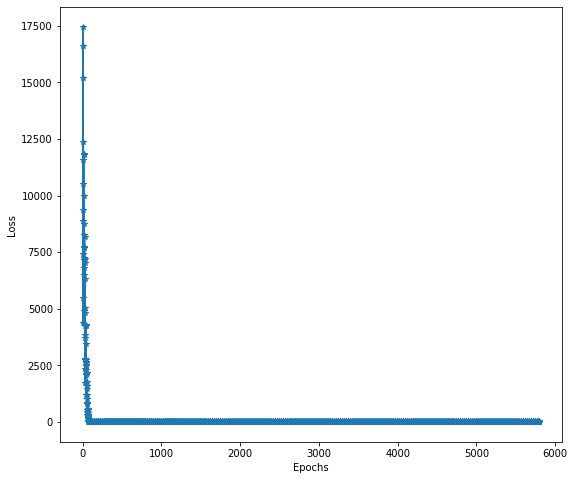

In [53]:
plt.figure(figsize=(9,8))
plt.plot(loss,'*-')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Loss vs. each parameter

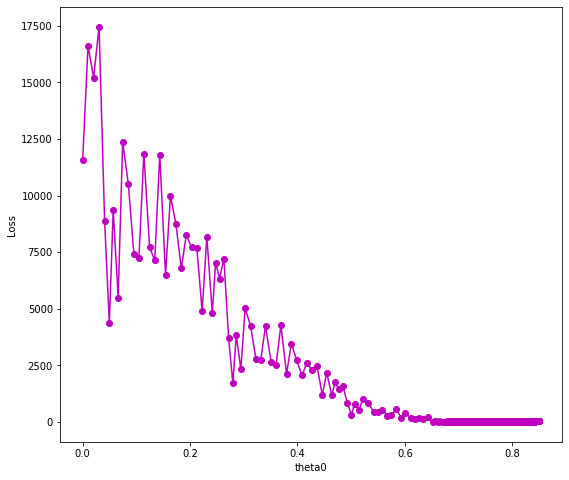

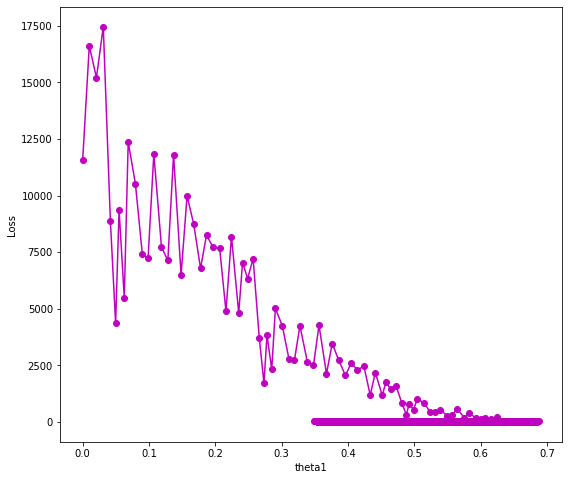

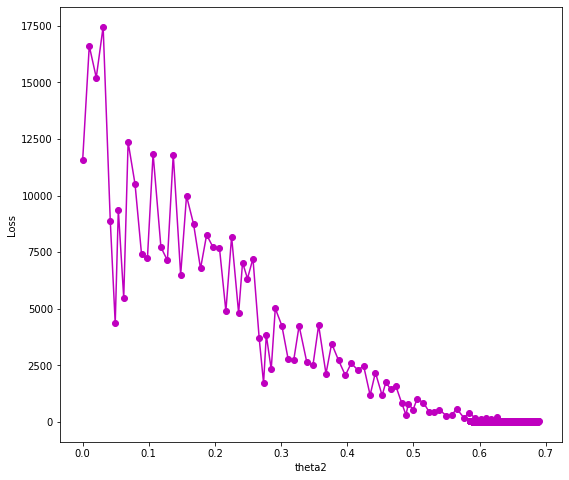

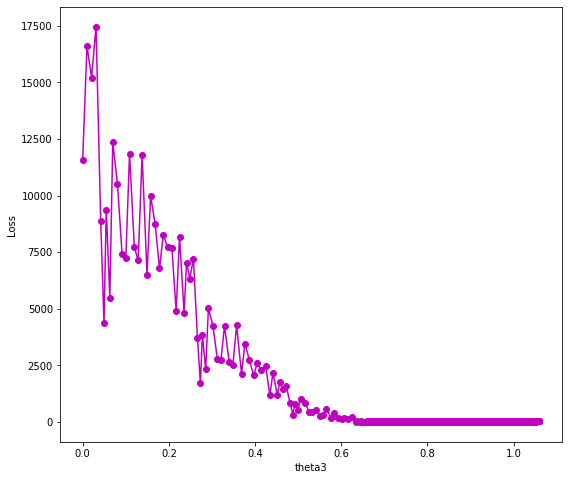

In [54]:
for i in range (weights.shape[1]):
    plt.figure(figsize=(9, 8))
    plt.plot(weights[:,i], loss,'o-',color='m')
    plt.xlabel(f'theta{i}')
    plt.ylabel('Loss')